## Predicting Patient Stay Days (Length of Stay in Hospital): Classification Models for Imbalanced Target Variable

## Introduction 

This analysis focuses on predicting Patients' Length of Stay (LOS) during the COVID-19 Pandemic. The COVID-19 pandemic overloaded hospital care resources and efficient resource management and allocation are vital to stablizing the healthcare system. The objective of this analysis is to develop machine learning models to predict LOS to help improve resource allocation since LOS is an important indiactor for monitoring health management processes. 

<B> Dataset</B>: The <a href="https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment">dataset</a> comes from Kaggle. A version of the dataset was originally used for Analytics Vidhya Healthcare Analytics Hackathon. The target variable for the dataset is Stay Days which is categorical with 9 categories representing range of days (length of stay in the hospital) between 0 to 100+ days. 

This analysis is an extension as well as a response to an analysis performed by The <a href="https://iopscience.iop.org/article/10.1088/1742-6596/1802/3/032038/meta">Jianing Pei et al.</a> which uses the Analytics Vidha Healthcare Analytics Hackathon dataset to predict patient's length of stay. In their analysis, their models achieved an accuracy score of 0.3541 using an optimized Random Forest algorithm. The researchers suggest for future analysis to improve model performance to condense the number of classses for the target variable since there is an imbalance in classes for the target variable. Moreover, in this analysis the target variable class will be reduced from 9 classes to 5 classes, by combining all Stay Days above 41 days into one class, 41+ days. In addition, this analysis will focus on data preprocessing and cleaning so that better performing models can be built. 

<B>Goals of Analysis:</B> <br>
    - Perform a thorough Exploratory Data Analysis (EDA), clean, and transform the data <br>
    - Split data into training, validation, and testing <br>
    - Build baseline models for classification of target variables, Stay Days (Hospital Length of Stay) <br>
    - Optimize classifiers that performed well from baseline models <br>
    - Peform additional model optimization <br>
    - Implement multiclass learning models <br>
    - Implement voting ensemble models <br>
    - Evaluate the best performing models on the test set <br>
    - Review final results and future analysis <br>

## Data Pre-Processing

### Load Packages 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings

# set display max columns
pd.set_option('display.max_columns', 100)

### Data Description

In [3]:
# View Data Dictionary:
hos_data_dic = pd.read_csv('hospital_los_data_dic.csv')
hos_data_dic

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


<font color='blue' size='3'>The dataset contains 18 columns with the description of each column indicated above. <br>

### Data Quality and Data Types

In [4]:
# Read and Display Dataset:
hos = pd.read_csv('hospital_los.csv')
hos

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [5]:
# Check data types and data quality:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

<font color='blue' size='3'>The original dataset contains 318,438 instances and out of the 18 features, 11 features are of numeric datatype as shown above. 7 features are object datatype or categorical features. case_id and patientid represent the same value. These two features will be dropped and not used in the analysis. </font>

In [6]:
# Find Number of Missing Values for Each Variable: 
hos.isnull().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

<font color='blue' size='3'>The dataset has missing values for Bed_Grade and City_Code_Patient. Since these are unique values and the size of the dataset is quite large at over 300,000 entries, the missing values will be removed for this analysis. </font>

In [7]:
# Remove All Missing Values:
hos_df = hos.dropna()
hos_df.isnull().sum() #recheck missing values

case_id                              0
Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Illness_Severity                     0
Patient_Visitors                     0
Age                                  0
Admission_Deposit                    0
Stay_Days                            0
dtype: int64

In [8]:
# Recheck Data Types and Quality:
hos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital                           313793 non-null  int64  
 2   Hospital_type                      313793 non-null  int64  
 3   Hospital_city                      313793 non-null  int64  
 4   Hospital_region                    313793 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility                      313793 non-null  object 
 9   Bed_Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  3137

In [9]:
# Summary Statistics: 
hos_df.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000
mean,158937.911120,18.326419,1.257781,4.778169,0.780358,3.196419,2.622952,65743.029382,7.252447,3.280857,4881.893165
std,91939.506976,8.633613,1.535338,3.103237,0.752329,1.167924,0.872618,37978.083237,4.745243,1.761758,1086.243945
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79271.000000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32833.000000,4.000000,2.000000,4188.000000
50%,158950.000000,19.000000,1.000000,5.000000,1.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4742.000000
75%,238399.000000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,98472.000000,8.000000,4.000000,5410.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


<font color='blue' size='3'>From the summary statistics, we can see that there appears to be outliers for Available_Extra_Rooms_in_Hospital, City_Code_Patient, and Patient_Visitors since the max is way more than 3 times the IQR for these features. We will confirm the presence of outliers by plotting the distribution of each feature.</font>

### Exploratory Data Analysis

#### Distribution of Numeric Features

<font color='blue' size='3'>First, we will examine the distribution and relationship of the numeric features through histogram and boxplots. The following numeric features will be examined: Hosptial, Hospital_type, Hospital_city, Hospital_region, Available_Extra_Rooms_in_Hospital, Bed_Grade, City_Code_Patient, Patient_Visitors, Admission_Deposit. There are a total of 9 features with numeric data type.</font>

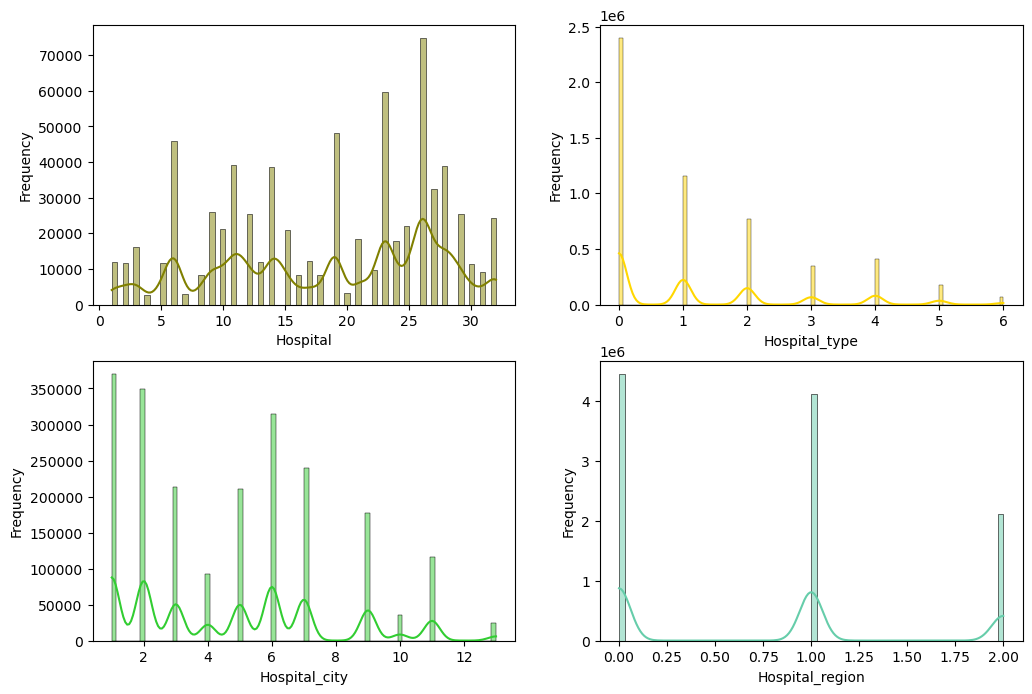

In [10]:
# Check distributions for numeric features:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(hos_df, x='Hospital', kde=True, color='olive', stat='frequency', ax=axes[0,0])
sns.histplot(hos_df, x='Hospital_type', kde=True, color='gold', stat='frequency', ax=axes[0,1])
sns.histplot(hos_df, x='Hospital_city', kde=True, color='limegreen', stat='frequency', ax=axes[1,0])
sns.histplot(hos_df, x='Hospital_region', kde=True, color='mediumaquamarine', stat='frequency', ax=axes[1,1])
plt.show()

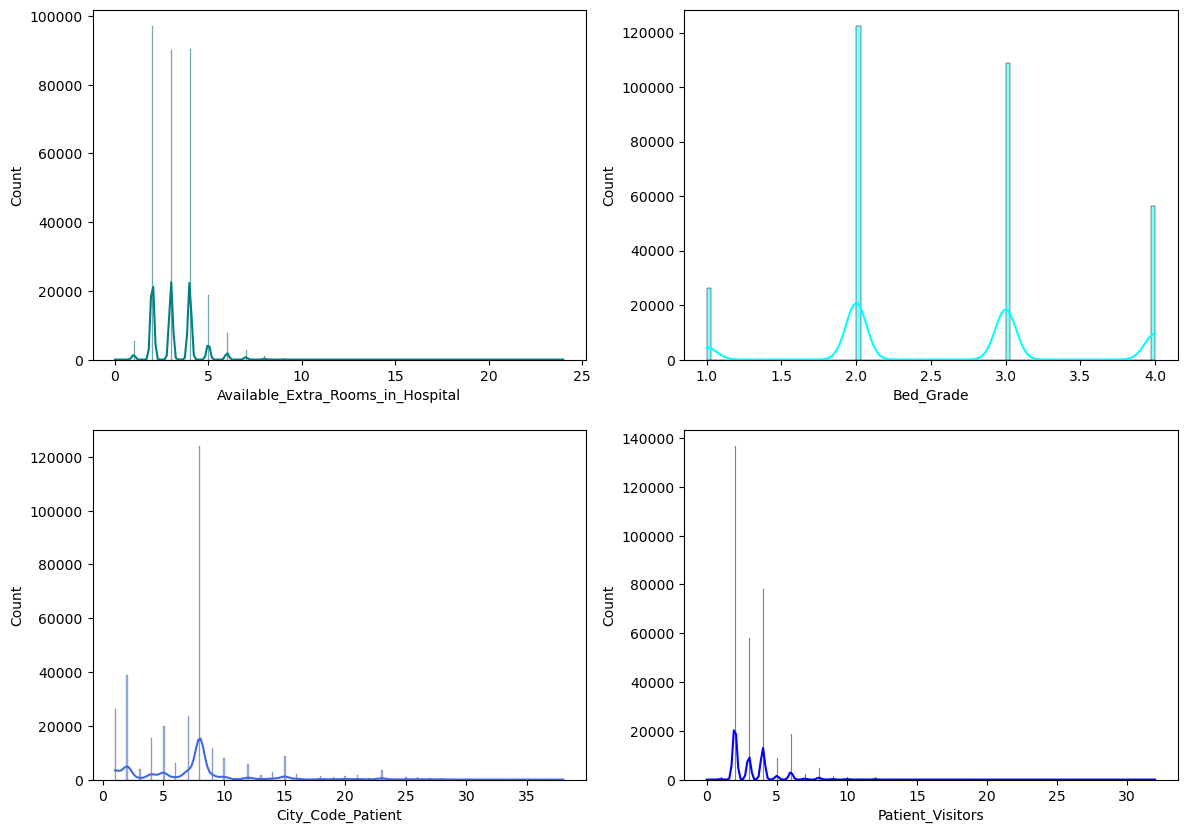

In [11]:
# Check distribution for numeric features:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(hos_df, x='Available_Extra_Rooms_in_Hospital', kde=True, color='teal', ax=axes[0,0])
sns.histplot(hos_df, x='Bed_Grade', kde=True, color='aqua', ax=axes[0,1])
sns.histplot(hos_df, x='City_Code_Patient', kde=True, color='royalblue', ax=axes[1,0])
sns.histplot(hos_df, x='Patient_Visitors', kde=True, color='blue', ax=axes[1,1])
plt.show()

<font color='blue' size='3'> Above, features such as Available_Extra_Rooms_in_Hospital, City_Code_Patient, and Patient_Visitors have outliers. For Available_Extra_Rooms_in_Hospital the outliers appear to occur after 7, whereas for City_Code_Patient the outliers occur around 15, and for Patient_Visitors the outliers occur around 7. The boxplots for the features below confirm the presence of outliers. </font>

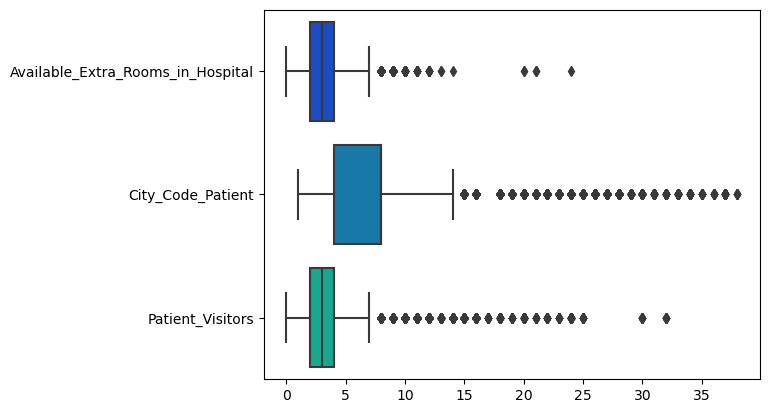

In [245]:
# Boxplots showing outliers for Available_Extra_Rooms_in_Hospital, City_Code_Patient, & Patient_Visitors:
sns.boxplot(data=hos_df[['Available_Extra_Rooms_in_Hospital', 'City_Code_Patient', 'Patient_Visitors']], 
            orient="h", palette='winter')
plt.show()

In [12]:
# Number of observations suspected as outliers for Available_Extra_Rooms_in_Hospital:
count1 = (hos_df['Available_Extra_Rooms_in_Hospital'] > 7).sum()
count1

1336

In [13]:
# Number of observations suspected as outliers for City_Code_Patient:
count2 = (hos_df['City_Code_Patient'] > 15).sum()
count2

15827

In [14]:
# Number of observations suspected as outliers for Patient_Visitors:
count2 = (hos_df['Patient_Visitors'] > 7).sum()
count2

9612

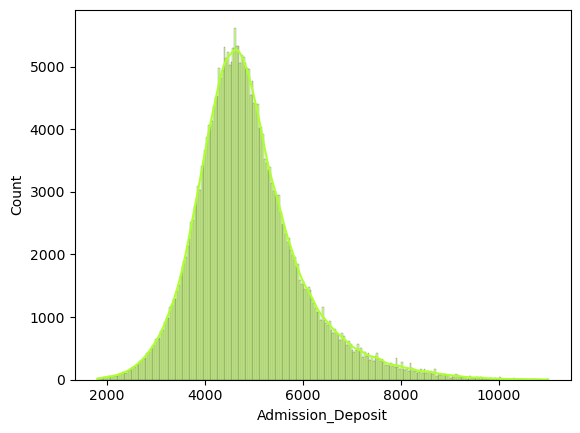

In [15]:
# Check distribution for Admission_Deposit:
sns.histplot(hos_df, x='Admission_Deposit', kde=True, color='greenyellow')
plt.show()

<font color='blue' size='3'> Admission deposit is the only numeric variable that has a fairly normal distribution. Hospital and Hospital City appear to have uniform distribution.</font>

#### Distribution of Categorical Features

<font color='blue' size='3'>Next, we will examine the distribution and relationship of the categorical features through countplots. The following categorical features will be examined: Department, Ward_Type, Ward_Facility, Type of Admission, Illness_Severity, Age, and Stay_Days. There are a total of 7 categorical features including the target variable, Stay_Days.</font>

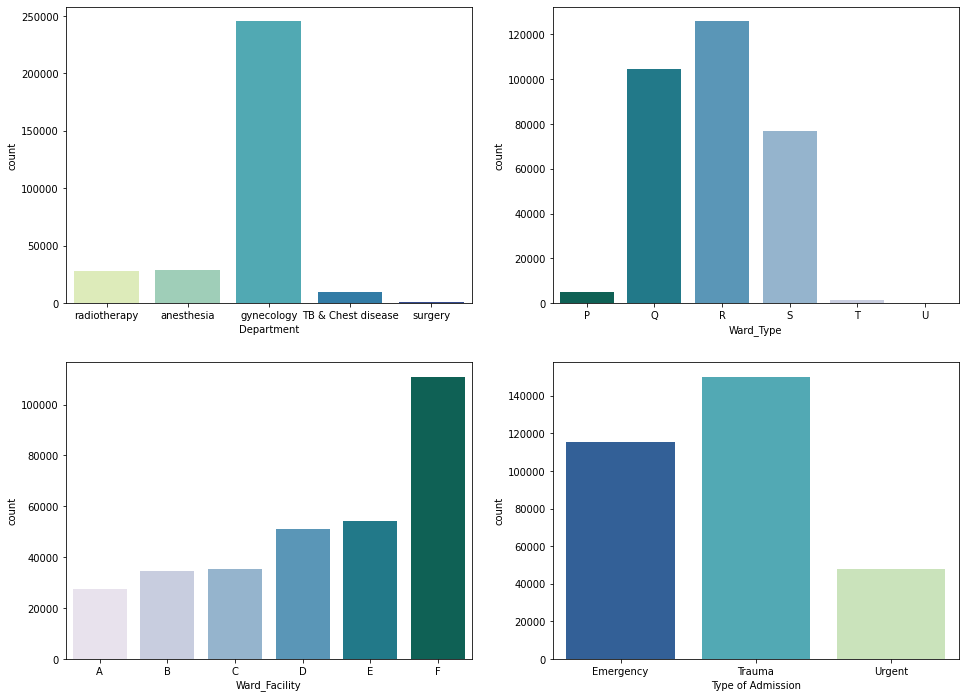

In [18]:
# Check distributions for categorical features:
ward_order = ['P', 'Q', 'R', 'S', 'T', 'U'] #order for Ward_Type
wfac_order = ['A', 'B', 'C', 'D', 'E', 'F'] #order for Ward_Facility
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # set fig size

sns.countplot(x=hos_df['Department'], palette='YlGnBu', ax=axes[0,0]) #plot Department
sns.countplot(x=hos_df['Ward_Type'], order=ward_order, palette='PuBuGn_r', ax=axes[0,1]) #plot by order
sns.countplot(x=hos_df['Ward_Facility'], order=wfac_order, palette='PuBuGn', ax=axes[1,0]) #plot by order
sns.countplot(x=hos_df['Type of Admission'], palette='YlGnBu_r', ax=axes[1,1]) #plot Type of Admission
plt.show()

In [19]:
# Value Counts for Department:
hos_df['Department'].value_counts()

gynecology            245850
anesthesia             29187
radiotherapy           28153
TB & Chest disease      9460
surgery                 1143
Name: Department, dtype: int64

In [20]:
# Proportion of each value for Department:
round(hos_df['Department'].value_counts(normalize=True) *100,2)

gynecology            78.35
anesthesia             9.30
radiotherapy           8.97
TB & Chest disease     3.01
surgery                0.36
Name: Department, dtype: float64

<font color='blue' size='3'>Above, the distribution for Ward_Type, Ward_Facility, and Type of Admission do not exhibit any abonormalities. However, the distribution for Department is highly skewed. Over 78% of the values are for the Gynecology department. This imbalance in distribution may affect the model later on. For this analysis, all instances for Department will remain in the analysis. </font>

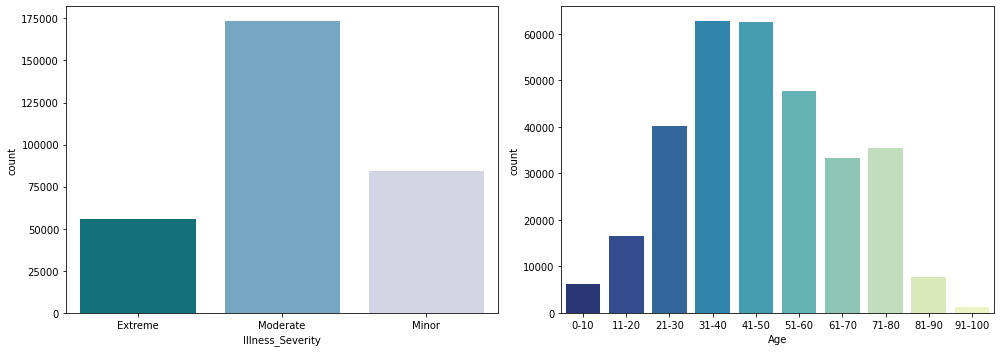

In [21]:
# Check distributions for Illness_Severity and Age:
# Order for Age
age_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'] 
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # set fig size

sns.countplot(x=hos_df['Illness_Severity'], palette='PuBuGn_r', ax=axes[0]) #plot for Illness_Severity
sns.countplot(x=hos_df['Age'], order=age_order, palette='YlGnBu_r', ax=axes[1]) #plot for Age by Order
plt.tight_layout() 
plt.show()

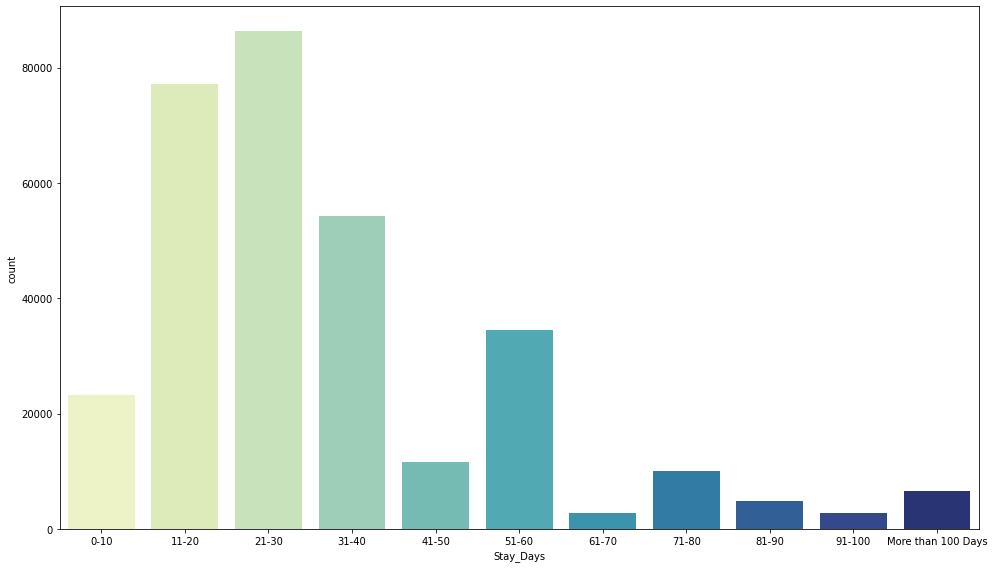

In [22]:
# Check distribution for Stay_Days:
stay_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days'] 
fig = plt.figure(figsize=(14, 8)) #above, order for stay_days, set fig size
sns.countplot(x=hos_df['Stay_Days'], order=stay_order, palette='YlGnBu') #plot based on order 
plt.tight_layout() 
plt.show()

In [23]:
# Value Counts for Stay_Days:
hos_df['Stay_Days'].value_counts()

21-30                 86316
11-20                 77095
31-40                 54312
51-60                 34463
0-10                  23250
41-50                 11541
71-80                 10096
More than 100 Days     6548
81-90                  4761
91-100                 2713
61-70                  2698
Name: Stay_Days, dtype: int64

In [24]:
# Proportion of each class for Stay_Days:
round(hos_df['Stay_Days'].value_counts(normalize=True) *100,2)

21-30                 27.51
11-20                 24.57
31-40                 17.31
51-60                 10.98
0-10                   7.41
41-50                  3.68
71-80                  3.22
More than 100 Days     2.09
81-90                  1.52
91-100                 0.86
61-70                  0.86
Name: Stay_Days, dtype: float64

<font color='blue' size='3'>Above, there is a class imbalance for the Stay_Days. 90% of the data for the target variable lands in 60 days of stay or less. Since the dataset has many instances and since the majority of the population does not stay more than 60 days in the hospital, in order to balance the target variable, all classes with 41 days or more will be combined into a new class labeled, '41+ Days'. </font>

### Handling Outliers and Transformations

#### Removal of Outliers for Numeric Features

<font color='blue' size='3'>Instances for Available_Extra_Rooms_in_Hospital and Patient_Visitors over 7 will be removed. Instances for City_Code_Patient over 15 will be removed. </font>

In [16]:
# Update Available_Extra_Rooms_in_Hospital Feature:
cond1 = hos_df['Available_Extra_Rooms_in_Hospital'] < 7
hos_df2 = hos_df[cond1]

In [17]:
# Update City_Code_Patient Feature:
cond2 = hos_df2['City_Code_Patient'] < 15 
hos_df3 = hos_df2[cond2]

In [18]:
# Update Patient_Visitors Feature:
cond3 = hos_df3['Patient_Visitors'] < 7
hos_df4 = hos_df3[cond3]

In [28]:
# Recheck Data:
hos_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274202 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            274202 non-null  int64  
 1   Hospital                           274202 non-null  int64  
 2   Hospital_type                      274202 non-null  int64  
 3   Hospital_city                      274202 non-null  int64  
 4   Hospital_region                    274202 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  274202 non-null  int64  
 6   Department                         274202 non-null  object 
 7   Ward_Type                          274202 non-null  object 
 8   Ward_Facility                      274202 non-null  object 
 9   Bed_Grade                          274202 non-null  float64
 10  patientid                          274202 non-null  int64  
 11  City_Code_Patient                  2742

In [29]:
# Recalculate Summary Statistics: 
hos_df4.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000,274202.000000
mean,156856.854476,18.395227,1.259258,4.798853,0.778164,3.134904,2.602085,65680.640889,6.225389,3.033169,4905.324392
std,91653.023209,8.644682,1.548230,3.094707,0.748784,1.057848,0.871178,37980.128423,3.011789,1.179913,1065.103524
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1801.000000
25%,77249.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32671.000000,4.000000,2.000000,4222.000000
50%,156369.500000,19.000000,1.000000,5.000000,1.000000,3.000000,3.000000,65659.500000,8.000000,3.000000,4763.000000
75%,235446.750000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,98348.000000,8.000000,4.000000,5421.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,6.000000,4.000000,131624.000000,14.000000,6.000000,11008.000000


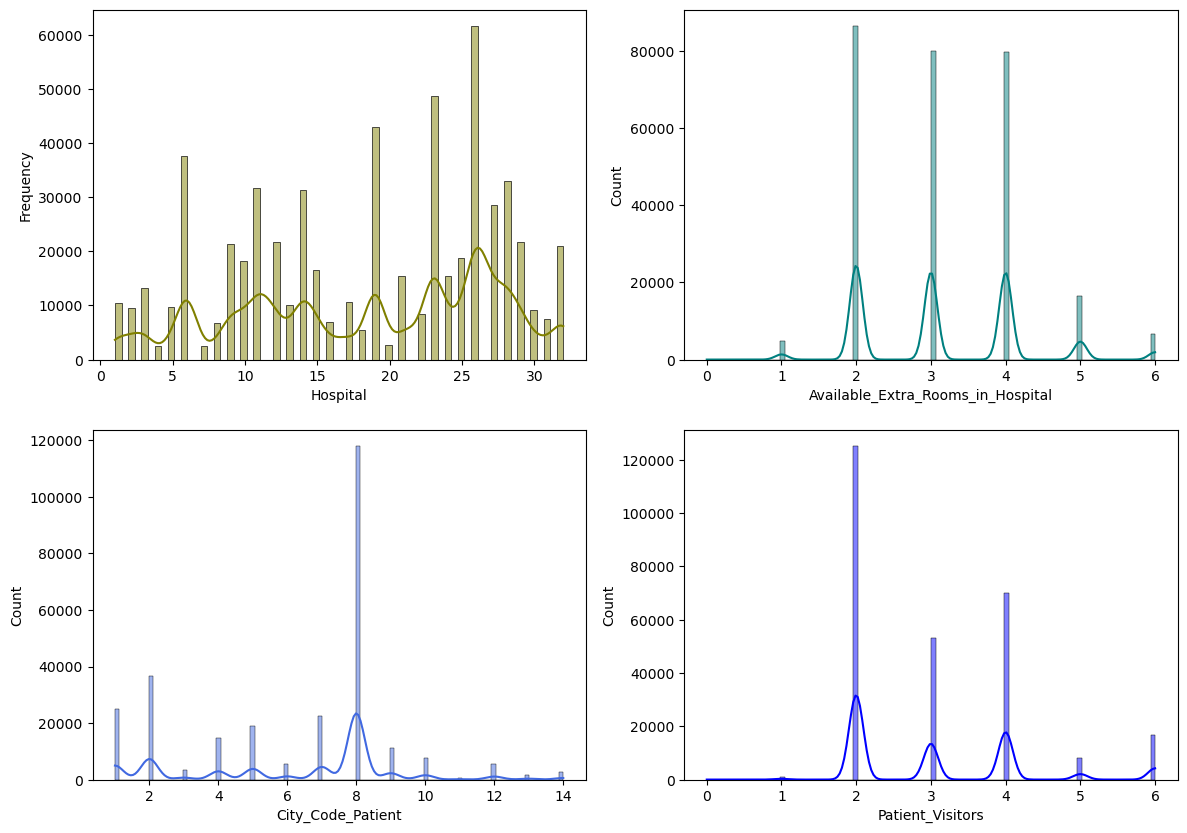

In [246]:
# Recheck distribution for Hospital, Available_Extra_Rooms_in_Hospital, City_Code_Patient, & Patient_Visitors
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(hos_df4, x='Hospital', kde=True, color='olive', stat='frequency', ax=axes[0,0])
sns.histplot(hos_df4, x='Available_Extra_Rooms_in_Hospital', kde=True, color='teal', ax=axes[0,1])
sns.histplot(hos_df4, x='City_Code_Patient', kde=True, color='royalblue', ax=axes[1,0])
sns.histplot(hos_df4, x='Patient_Visitors', kde=True, color='blue', ax=axes[1,1])
plt.show()

<font color='blue' size='3'>After removing outliers for Available_Extra_Rooms_in_Hospital, City_Code_Patient, and Patient_Visitors, the dataset now has 274,202 instances. The distribution of these features are now less skewed, although the distributions are not normally distributed.</font>

#### Transforming Categorical Features

<font color='blue' size='3'><B>Age</B>: Since there are very few instances for age 91-100, this value will be combined with 81-90, combined as 81+. </font>

In [31]:
# Value Counts for Age:
hos_df4['Age'].value_counts()

31-40     54916
41-50     54682
51-60     41746
21-30     34951
71-80     31008
61-70     29187
11-20     14336
81-90      6899
0-10       5348
91-100     1129
Name: Age, dtype: int64

In [32]:
# Proportion of each class for Age:
round(hos_df4['Age'].value_counts(normalize=True) *100,2)

31-40     20.03
41-50     19.94
51-60     15.22
21-30     12.75
71-80     11.31
61-70     10.64
11-20      5.23
81-90      2.52
0-10       1.95
91-100     0.41
Name: Age, dtype: float64

In [19]:
# Replace 81-90 and 91-100, as 81+ for Age:
hos_df4['Age'] = hos_df4['Age'].replace(['81-90', '91-100'], '81+')

In [20]:
# Recheck Value Counts for Age:
hos_df4['Age'].value_counts()

31-40    54916
41-50    54682
51-60    41746
21-30    34951
71-80    31008
61-70    29187
11-20    14336
81+       8028
0-10      5348
Name: Age, dtype: int64

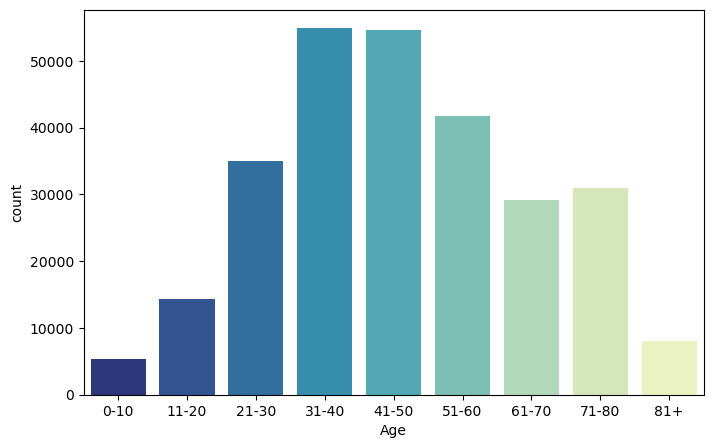

In [247]:
# Recheck distribution for Age: 
fig = plt.figure(figsize=(8, 5))
age_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'] 
sns.countplot(x=hos_df4['Age'], order=age_order, palette='YlGnBu_r')
plt.show()

<font color='blue' size='3'><B>Stay_Days</B>: Next, we will combine Stay_Days 41-50, 51-60, 61-70, 71-80, 81-90, 91-100, and more than 100 days as 41+ days. </font>

In [36]:
# Value Counts for Stay_Days:
hos_df4['Stay_Days'].value_counts()

21-30                 77902
11-20                 69498
31-40                 48098
51-60                 29599
0-10                  20703
41-50                 10137
71-80                  7849
81-90                  3221
More than 100 Days     2936
61-70                  2271
91-100                 1988
Name: Stay_Days, dtype: int64

In [37]:
# Proportion of each class for Stay_Days:
round(hos_df4['Stay_Days'].value_counts(normalize=True) *100,2)

21-30                 28.41
11-20                 25.35
31-40                 17.54
51-60                 10.79
0-10                   7.55
41-50                  3.70
71-80                  2.86
81-90                  1.17
More than 100 Days     1.07
61-70                  0.83
91-100                 0.73
Name: Stay_Days, dtype: float64

In [21]:
# Replace 41-50, 51-60, 61-70, 71-80, 81-90, 91-100, and more than 100 days as 41+ for Stay_Days:
hos_df4['Stay_Days'] = hos_df4['Stay_Days'].replace(['41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days'], '41+')

In [22]:
# Recheck Value Counts for Stay_Days:
hos_df4['Stay_Days'].value_counts()

21-30    77902
11-20    69498
41+      58001
31-40    48098
0-10     20703
Name: Stay_Days, dtype: int64

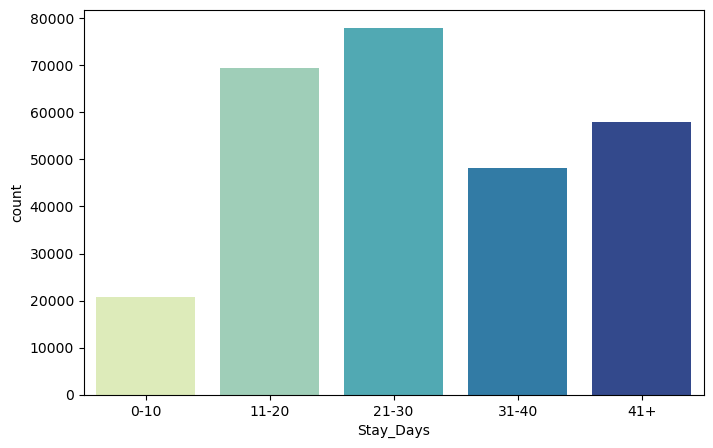

In [248]:
# Recheck distribution for Stay_Days:
stay_order = ['0-10', '11-20', '21-30', '31-40', '41+'] #order for Stay_Days
fig = plt.figure(figsize=(8, 5)) #set fig size
sns.countplot(x=hos_df4['Stay_Days'], order=stay_order, palette='YlGnBu') #plot by order
plt.show()

## Set-Up & Preparation for Machine Learning

In [251]:
# Reset Index in the DF: 
hos_df4 = hos_df4.reset_index(drop=True) #reset index without adding index as a column
hos_df4 #check DF

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41+
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41+
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274197,318433,26,1,2,1,2,anesthesia,R,D,3.0,36018,6.0,Emergency,Minor,3,11-20,8308.0,21-30
274198,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81+,6699.0,31-40
274199,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
274200,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [252]:
X = hos_df4.drop(['case_id','Stay_Days', 'patientid'], axis=1) # Create DF for Features (remove case_id and Stay_Days)
y = hos_df4['Stay_Days'] # Create DF for Target

In [253]:
X # View Features 

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274197,26,1,2,1,2,anesthesia,R,D,3.0,6.0,Emergency,Minor,3,11-20,8308.0
274198,24,0,1,0,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81+,6699.0
274199,7,0,4,0,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80,4235.0
274200,11,1,2,1,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20,3761.0


In [254]:
y # View Target

0          0-10
1           41+
2         31-40
3           41+
4           41+
          ...  
274197    21-30
274198    31-40
274199    11-20
274200    11-20
274201     0-10
Name: Stay_Days, Length: 274202, dtype: object

### Encoding for Categorical Features

#### Dummies for Categorical Features

<font color='blue' size='3'>Since many of the features are categorical, dummy variables will be created for each categorical feature. The following categorical features will be transformed: Department, Ward_Type, Ward_Facility, Type of Admission, Illness_Severity, and Age. There are several numeric features that are likely categorical in nature including Hospital_type, Hospital_city, Hospital_region, Bed_Grade, and City_Code_Patient. Bed_Grade is the condition of the bed which is likely ordinal as it represents a ranking of quality condition. For this analysis, these features will remain as numeric and will treated as numeric for the models. Turning these features into dummies will increase the dimensionality of the data but does not significantly increase model performance. </font>

In [255]:
# Specify Categorical Columns, Transform into dummy variables
cat_feats = ['Department', 'Ward_Type', 'Ward_Facility', 'Type of Admission', 'Illness_Severity', 'Age']
X_dummies = pd.get_dummies(X, columns=cat_feats, drop_first=False)

In [256]:
# Check Info for Dummies DF: 
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274202 entries, 0 to 274201
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital                           274202 non-null  int64  
 1   Hospital_type                      274202 non-null  int64  
 2   Hospital_city                      274202 non-null  int64  
 3   Hospital_region                    274202 non-null  int64  
 4   Available_Extra_Rooms_in_Hospital  274202 non-null  int64  
 5   Bed_Grade                          274202 non-null  float64
 6   City_Code_Patient                  274202 non-null  float64
 7   Patient_Visitors                   274202 non-null  int64  
 8   Admission_Deposit                  274202 non-null  float64
 9   Department_TB & Chest disease      274202 non-null  uint8  
 10  Department_anesthesia              274202 non-null  uint8  
 11  Department_gynecology              2742

<font color='blue' size='3'>Above, the dummies have been created for the categorical features and the dimensionality of the data has increased to 41 variables. The total number of rows is 274,202 and the total number of columns is 41.</font>

#### Label Encoder for Target Variable

<font color='blue' size='3'>The target variable, Stay_Days can be considered an ordinal variable since each value represents a progression of the number of days in the hospital. Staying shorter amount of days may have diffferent implications than staying longer days. Since the target variable is ordinal, the target variable will be encoded using Label Encoder with specific order. The target variable will have 5 categories and this analysis will be a multiclass classification prediction. </font>

In [257]:
# Instantiate the label encoder
label_encoder = LabelEncoder()

In [258]:
# Assign encoded values to y 
y_T = label_encoder.fit_transform(y)

In [259]:
# Review Econding for y_T
yunique = np.unique(y)
y_Tunique = np.unique(y_T)
y_encode = dict(zip(yunique, y_Tunique))
print(y_encode)

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41+': 4}


In [260]:
# View encoded y_T
y_T

array([0, 4, 3, ..., 1, 1, 0])

<font color='blue' size='3'>Above, the target has been transformed appropriately in ordinal order. The target will be encoded as 0-10 days: 0, 11-20 days: 1, 21-30 days: 2, 31-40 days: 3, and 41+ days: 4</font>

### Train Test Split

<font color='blue' size='3'>The data will be split into train, validation, and test sets. The ratio for the split will follow a standard ratio of 70-20-10, 70% train, 20% validation, and 10% test. Random State will be set to 0 for all algorithms. <font>

In [261]:
# Split Data into Train, Validation, and Test Sets at 70-20-10 ratio:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_T, test_size=0.10, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [262]:
X_train.shape # Check Training size

(197424, 41)

In [263]:
X_val.shape # Check Validation size

(49357, 41)

In [264]:
X_test.shape # Check Normalized Testing

(27421, 41)

In [265]:
# Print Train Test Ratio Split
print(f"Train Ratio: {X_train.shape[0]/X.shape[0]:.2f} %")
print(f"Validation Ratio: {X_val.shape[0]/X.shape[0]:.2f} %")
print(f"Test Ratio: {X_test.shape[0]/X.shape[0]:.2f} %")

Train Ratio: 0.72 %
Validation Ratio: 0.18 %
Test Ratio: 0.10 %


### Min-Max Normalization

<font color='blue' size='3'>Since the features range in value, the features will be scaled. Since the majority of the features do not follow a normal distribution, the features will be scaled using Min-Max Normalization. This scaling technique shifts values and rescales to fit within a range between 0 and 1. The normalized features will be used in the Support Vector Classifier models. <font>

In [266]:
# Normalize Features using Min-Max Scaler
mm = MinMaxScaler()
mm.fit(X_train)
X2n_train = mm.transform(X_train)
X2n_val = mm.transform(X_val)
X2n_test = mm.transform(X_test)

In [267]:
X2n_train.shape # Check Normalized Training

(197424, 41)

In [268]:
X2n_val.shape # Check Normalized Validation

(49357, 41)

In [269]:
X2n_test.shape # Check Normalized Testing

(27421, 41)

### Utility Functions

In [42]:
# Function to Plot Validation Curve:
def plot_validation_curve(scores_params, param_name):
    plt.plot(scores_params, label='cv') #plot the scores
    plt.xticks(np.arange(len(param_name)), param_name, rotation=45) #set the x-axis ticks
    plt.xlabel(str(param_name)) #label x-axis
    plt.ylabel('Score') #label y-axis
    plt.title('Validation Curve') # set title 
    plt.legend() #show legend
    plt.show() #show plot 

In [207]:
# Function to Fit Model, Make Prediction, and Get Scores saved as a DF:
def fit_predict_score(model, X_train, y_train, X_val, y_val): #takes as input model, X, and Y 
    model.fit(X_train, y_train) #fit model with training data
    y_pred = model.predict(X_val) #predict on validation data
    acc = np.round(accuracy_score(y_val, y_pred), 4) #accuracy rounded to 4 decimals
    bal_acc = np.round(balanced_accuracy_score(y_val, y_pred), 4) #balanced accuracy rounded to 4 decimals
    scores = {'Model': [model.__class__.__name__], 'Accuracy':[acc], 'Balanced Accuracy': [bal_acc]} #place model name & scores in dict
    scores_df = pd.DataFrame(scores) #create df for scores 
    return scores_df #return df

In [44]:
# Function to Fit Model, Make Prediction, Display Confusion Matrix with Accuracy Score & Classification Report
def fit_predict_display_scores(model, X_train, y_train, X_val, y_val): #takes as input model, X, and Y 
    model.fit(X_train, y_train) #fit model with training data
    y_pred = model.predict(X_val) #predict on validation data
    acc = np.round(accuracy_score(y_val, y_pred), 4) #accuracy rounded to 4 decimals
    metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred) #display confusion matrix
    plt.title(str(model.__class__.__name__) + ' | ' + 'Accuracy: ' + str(acc), fontsize=12) #title confusion matrix with name of clf and acc
    plt.show() #show plot
    print(classification_report(y_val, y_pred)) #print classification reprot

In [69]:
# Function that Plots Feature Importance 
def plot_feature_importances(model, df):
    n_features = df.shape[1] #capture features from DF
    df_colnames= df.columns #capture feature names
    plt.barh(np.arange(n_features), model.feature_importances_, align='center', color='teal') #bar plot 
    plt.yticks(np.arange(n_features), df_colnames) #set the y-ticks 
    plt.xlabel("Feature Importance") #label x-axis
    plt.ylabel("Features") #label y-axis
    plt.title(str(model)) #set title 
    plt.ylim(-1, n_features) #set the y-axis limits

In [48]:
# Function that Predicts on a best_estimator and Displays Confusion Matrix with Accuracy Score
def fit_predict_display_bestscores(best_est, X_val, y_val): #takes as input model, X, and Y 
    y_pred = best_est.predict(X_val) #predict on validation data
    acc = np.round(accuracy_score(y_val, y_pred), 4) #accuracy rounded to 4 decimals
    metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred) #display confusion matrix
    plt.title(str(best_est.__class__.__name__) + ' | ' + 'Accuracy: ' + str(acc), fontsize=12) #title confusion matrix with name of clf and acc
    plt.show() #show plot
    print(classification_report(y_val, y_pred)) #print classification reprot

In [49]:
# Function that Predicts on a best_estimator and Gets Scores saved as a DF
def fit_predict_bestscore(best_est, X_val, y_val): #takes as input model, X, and Y 
    y_pred = best_est.predict(X_val) #predict on validation data
    acc = np.round(accuracy_score(y_val, y_pred), 4) #accuracy rounded to 4 decimals
    bal_acc = np.round(balanced_accuracy_score(y_val, y_pred), 4) #balanced accuracy rounded to 4 decimals
    scores = {'Model': [best_est.__class__.__name__], 'Accuracy':[acc], 'Balanced Accuracy': [bal_acc]} #place model name & scores in dict
    scores_df = pd.DataFrame(scores) #create df for scores 
    return scores_df #return df

## Baseline Models for Training/Validation

<font color='blue' size='3'> First, baseline classifier models will be built and fit to the training data and evaluated using the validation data. Since the there is an imbalance in target class distribution, f1 score will be used for the scoring method for all classiifers. The performance metric will be determined by model accuracy and balanced accuracy. Confusion matrix and classification reports will be generated for all models for evaluation. Models will be evaluated based on the validation data. </font>

<font color='blue' size='3'> <B>Tree-Based Classifiers</B>: Random Forest Classifier, Adaboost Classifier, and Gradient Boosting Classifier will be fitted as models. These classifiers are robust to outliers, supports non-linear and multi-class predictions, and can handle categorical features. <br></font>

<font color='blue' size='3'> <B>Other Classifiers</B>: The following classifiers support multiclass prediction and will be fitted as models for comparsion: K-Nearest Neighbor Classifier, Linear Discriminant Analysis (LDA), Linear Support Vector Classifier (SVC), and Stochastic Gradient Descent (SGD) Classifier using SVC as the loss function.</font> 

In [270]:
# Random Forest: Initialize the Random Forest Classifier w/ Default Parameters
RF = RandomForestClassifier(random_state=0, class_weight='balanced') # balanced class_weight 

# GradientBoost: Initialize the Gradient Boosting Classifier w/ Default Parameters
gbst = GradientBoostingClassifier(random_state=0)

# Adaboost: Initialize the Adaboost Classifier w/ Default Parameters
AdaB = AdaBoostClassifier(random_state=0)

# KNN Classifier: Initialize the KNN Classifier w/ Default Parameters
knn = KNeighborsClassifier(n_jobs = -1)

# LDA Classifier: Initialize the LDA Classifier w/ Default Parameters
lda = LinearDiscriminantAnalysis()

# SVC Classifier: Initialize the LDA Classifier w/ Default Parameters
linSVC = LinearSVC(random_state=0, class_weight='balanced') # balanced class_weight

# SGD Classifier: Initialize the SGD Classifier w/ Default Parameters
SGD = SGDClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

### Random Forest Classifier

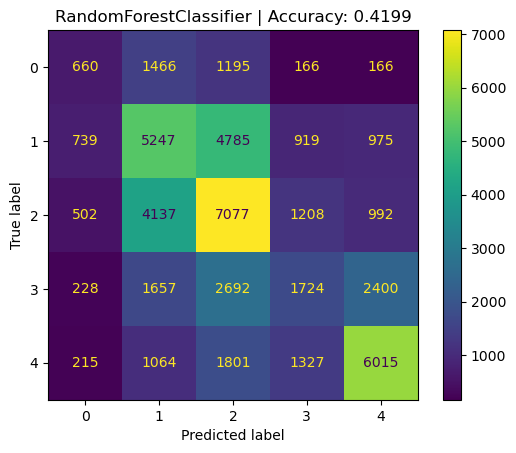

              precision    recall  f1-score   support

           0       0.28      0.18      0.22      3653
           1       0.39      0.41      0.40     12665
           2       0.40      0.51      0.45     13916
           3       0.32      0.20      0.25      8701
           4       0.57      0.58      0.57     10422

    accuracy                           0.42     49357
   macro avg       0.39      0.38      0.38     49357
weighted avg       0.41      0.42      0.41     49357



In [271]:
# Random Forest: 
RF_val = fit_predict_score(RF, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(RF, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

### Gradient Boosting Classifier

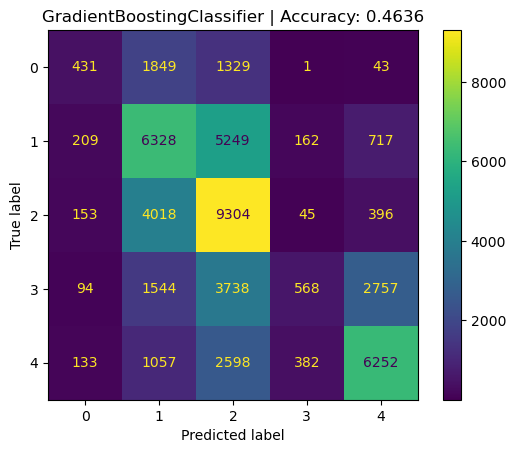

              precision    recall  f1-score   support

           0       0.42      0.12      0.18      3653
           1       0.43      0.50      0.46     12665
           2       0.42      0.67      0.51     13916
           3       0.49      0.07      0.12      8701
           4       0.62      0.60      0.61     10422

    accuracy                           0.46     49357
   macro avg       0.47      0.39      0.38     49357
weighted avg       0.48      0.46      0.43     49357



In [278]:
# GradientBoost: 
gbst_val = fit_predict_score(gbst, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(gbst, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

### AdaBoost Classifier

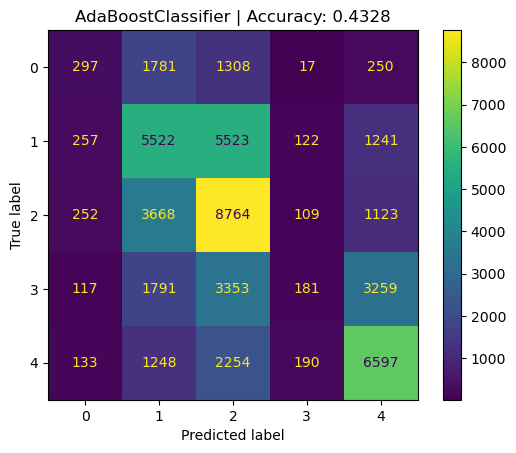

              precision    recall  f1-score   support

           0       0.28      0.08      0.13      3653
           1       0.39      0.44      0.41     12665
           2       0.41      0.63      0.50     13916
           3       0.29      0.02      0.04      8701
           4       0.53      0.63      0.58     10422

    accuracy                           0.43     49357
   macro avg       0.38      0.36      0.33     49357
weighted avg       0.40      0.43      0.38     49357



In [272]:
# AdaBoost: 
AdaB_val = fit_predict_score(AdaB, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(AdaB, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

### KNearest Neighbor Classifier

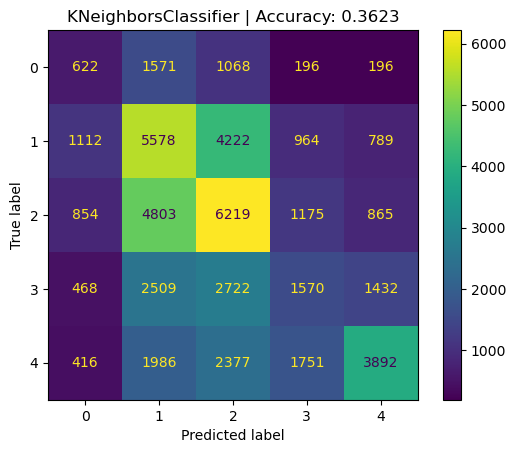

              precision    recall  f1-score   support

           0       0.18      0.17      0.17      3653
           1       0.34      0.44      0.38     12665
           2       0.37      0.45      0.41     13916
           3       0.28      0.18      0.22      8701
           4       0.54      0.37      0.44     10422

    accuracy                           0.36     49357
   macro avg       0.34      0.32      0.33     49357
weighted avg       0.37      0.36      0.36     49357



In [273]:
# KNN:
knn_val = fit_predict_score(knn, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(knn, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

### Linear Discriminant Analysis (LDA) Classifier

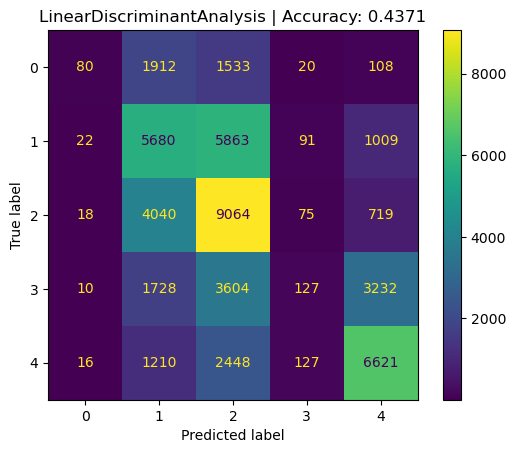

              precision    recall  f1-score   support

           0       0.55      0.02      0.04      3653
           1       0.39      0.45      0.42     12665
           2       0.40      0.65      0.50     13916
           3       0.29      0.01      0.03      8701
           4       0.57      0.64      0.60     10422

    accuracy                           0.44     49357
   macro avg       0.44      0.35      0.32     49357
weighted avg       0.42      0.44      0.38     49357



In [274]:
# LDA:
lda_val = fit_predict_score(lda, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(lda, X2n_train, y_train, X2n_val, y_val)  # display  confusion matrix + score

### Support Vector Classifier (SVC)

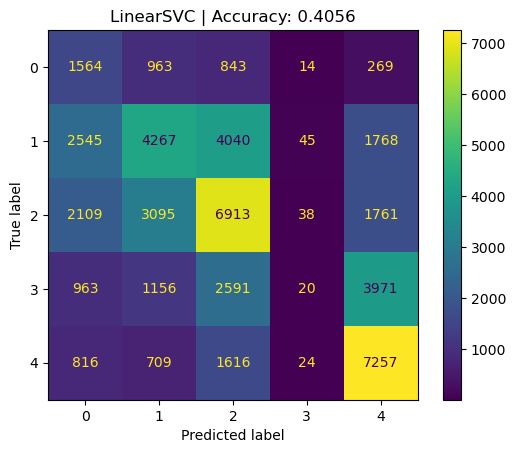

              precision    recall  f1-score   support

           0       0.20      0.43      0.27      3653
           1       0.42      0.34      0.37     12665
           2       0.43      0.50      0.46     13916
           3       0.14      0.00      0.00      8701
           4       0.48      0.70      0.57     10422

    accuracy                           0.41     49357
   macro avg       0.33      0.39      0.34     49357
weighted avg       0.37      0.41      0.37     49357



In [275]:
# Linear SVC
linSVC_val = fit_predict_score(linSVC, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(linSVC, X2n_train, y_train, X2n_val, y_val) # display confusion matrix + score

### Stochastic Gradient Descent (SGD) Classifier

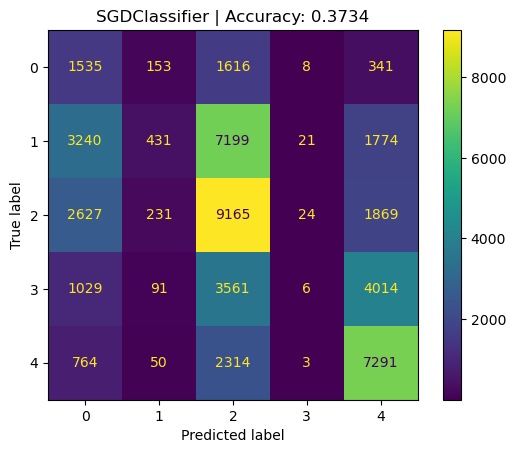

              precision    recall  f1-score   support

           0       0.17      0.42      0.24      3653
           1       0.45      0.03      0.06     12665
           2       0.38      0.66      0.49     13916
           3       0.10      0.00      0.00      8701
           4       0.48      0.70      0.57     10422

    accuracy                           0.37     49357
   macro avg       0.32      0.36      0.27     49357
weighted avg       0.35      0.37      0.29     49357



In [276]:
# SGD 
sgd_val = fit_predict_score(SGD, X2n_train, y_train, X2n_val, y_val)
fit_predict_display_scores(SGD, X2n_train, y_train, X2n_val, y_val)

### Results Summary for Baseline Models

In [279]:
# Display Accuracy Results for Baseline Models
base_df = [knn_val, sgd_val, linSVC_val, RF_val, AdaB_val, lda_val, gbst_val]
base_results = pd.concat(base_df, ignore_index=True) #combine all model results
base_results

,Model,Accuracy,Balanced Accuracy
0,KNeighborsClassifier,0.3623,0.3223
1,SGDClassifier,0.3734,0.3626
2,LinearSVC,0.4056,0.3921
3,RandomForestClassifier,0.4199,0.3758
4,AdaBoostClassifier,0.4328,0.3602
5,LinearDiscriminantAnalysis,0.4371,0.3543
6,GradientBoostingClassifier,0.4636,0.3903


<font color='blue' size='3'> Above, GradientBoosting Classifier performed the best with an accuracy score of <B>0.4636</B> on the validation set. LDA Classifier acheived an accuracy score of <B>0.4371</B> and AdaBoost Classifier achieved a score of <B>0.4328</B>. Random Forest achieved an accuracy score of <B>0.4199</B> and SVC Classifier achieved an accuracy score of <B>0.4056</B>. SGD Classifier and KNN Classifier did not perform as well which is expected since these classifiers perform better with numeric features. Next, hyperparameter tuning will be implemented to optimize and improve model performance.</font>

## Optimized Models

### Hyperparameter Tuning with GridSearchCV

<font color='blue' size='3'> Random Forest, AdaBoost, and GradientBoost models will be tuned using GridSearchCV. These classifiers performed the best out of the baseline models. Due to the large size of the dataset and the processing power involved with GridSearch, only one parameter value will be used in the GridSearch to find the optimized model. For Random Forest, max_depth will be optimized. For AdaBoost and GradientBoost, learning rate will be optimized. <br><br>
    <B>Cross-Validation:</B> StratfiedKFold will be implemented with 3 folds. Since the dataset is quite large, to ensure processing power and resources are available, cv = 3 will be implemented. With large datasets it is generally acceptable to use 3 folds. </font>

#### Random Forest Optimization

##### Apply GridSearchCV to find optium parameter value for max_depth

In [58]:
# Check values for max_depth
max_depth = [1, 5, 10, 15, 20, 30]

In [59]:
# Search parameter and get scores for each value
scores_params = [] #append scores 
for m in max_depth: #for each value in max_depth
    RF = RandomForestClassifier(random_state=0, class_weight='balanced', max_depth=m) #initiate RF Classifier
    scores = cross_val_score(RF, X=X2n_train, y=y_train, cv=3) #get cv score using classifer
    scores_params.append(scores.mean()) #append mean score

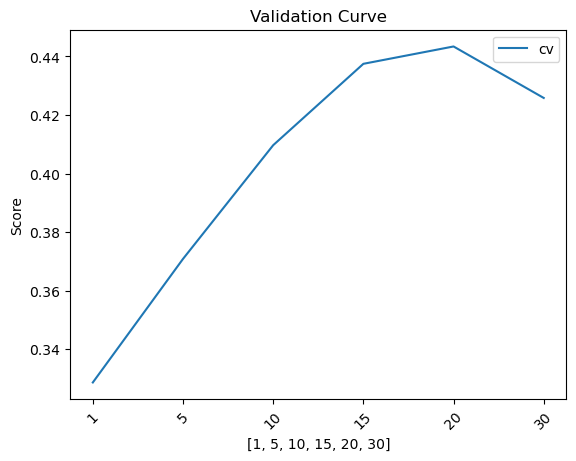

In [60]:
# Plot Validation Curve
plot_validation_curve(scores_params, max_depth)

<font color='blue' size='3'> Above, the validation curve shows that the best scores occured when max_depth is between 15 and 25. Values within this range will be checked in the GridSearch. </font>

##### Get Best Estimator from GridSearchCV with optium parameter value for max_depth

In [61]:
# Create parameter dictionary for max_depth
RF_params = dict( 
    max_depth = [15, 17, 19, 20, 21])

In [62]:
# Initiate Grid Search for max_depth
gs_RF = GridSearchCV(estimator=RF, param_grid=RF_params, cv=3, n_jobs=-1)

In [63]:
# Fit GridSearchCV to Training Set
gs_RF.fit(X2n_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=30, random_state=0),
             n_jobs=-1, param_grid={'max_depth': [15, 17, 19, 20, 21]})

In [72]:
# Capture Best Estimator Model for RF
best_RF = gs_RF.best_estimator_ #get best estimator
best_RF_val = fit_predict_bestscore(best_RF, X2n_val, y_val) #get scores to df 
best_RF #show best estimator params

RandomForestClassifier(class_weight='balanced', max_depth=19, random_state=0)

##### View Accuracy, Confusion Matrix, and Performance

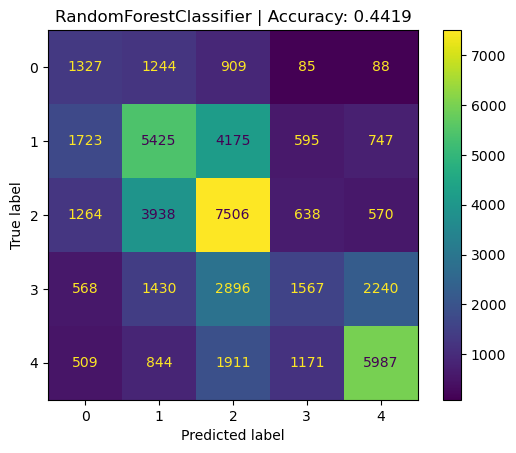

              precision    recall  f1-score   support

           0       0.25      0.36      0.29      3653
           1       0.42      0.43      0.42     12665
           2       0.43      0.54      0.48     13916
           3       0.39      0.18      0.25      8701
           4       0.62      0.57      0.60     10422

    accuracy                           0.44     49357
   macro avg       0.42      0.42      0.41     49357
weighted avg       0.45      0.44      0.44     49357



In [65]:
# View Accuracy, Confusion Matrix, and Performance
fit_predict_display_bestscores(best_RF, X2n_val, y_val)

##### Plot Feature Importance for Best Estimator

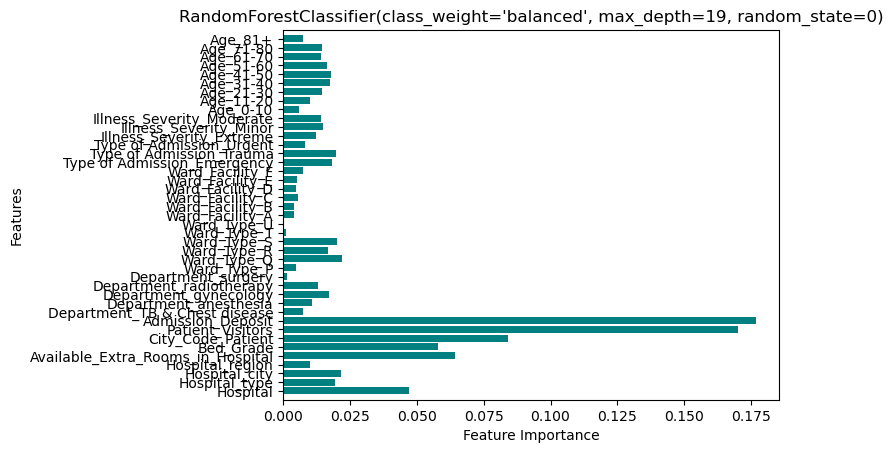

In [70]:
# Check Feature Importance from the model: 
plot_feature_importances(best_RF, X_dummies)

<font color='blue' size='3'>With the GridSearchCV, the best estimator for Random Forest has a max_depth=19 and achieved a validation accuracy of <B>0.4419</B>, which is an improvement from the baseline model. From the F1 scores, the model appears to be able to predict class 1, 2, and 4 better than class 0 and 3. Above, the feature importance plot shows that the most salient features are Admission Deposit, Patient Visitors, City Code Patient, Bed Grade, Available Extra Rooms in Hospital, and Hospital. These features represent the numeric features in the dataset.</font>

#### Gradient Boost Optimization

##### Apply GridSearchCV to find optium parameter value for learning rate

In [76]:
# Check values for learning_rate 
learning_rate = [0.01, 0.1, 0.5, 1.0, 1.5]

In [77]:
# Search parameter and get scores for each value
scores_params = [] #append scores 
for m in learning_rate: #for each value in learning_rate
    gbst = GradientBoostingClassifier(random_state=0, learning_rate=m)
    scores = cross_val_score(gbst, X=X2n_train, y=y_train, cv=3) #get cv score using classifer
    scores_params.append(scores.mean()) #append mean score

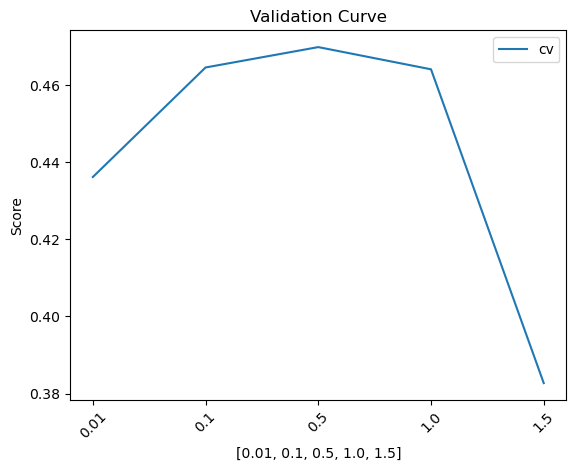

In [79]:
# Plot Validation Curve
plot_validation_curve(scores_params, learning_rate)

<font color='blue' size='3'> Above, the validation curve shows that the best scores occured when the learning rate is between 0.1 and 1.0. Values within this range will be checked in the GridSearch. </font>

##### Get Best Estimator from GridSearchCV with optium parameter value for learning rate

In [80]:
# Create parameter dictionary for learning_rate
gbst_params = dict( 
    learning_rate = [0.4, 0.5, 0.6])

In [81]:
# Initiate Grid Search for learning_rate
gs_gbst = GridSearchCV(estimator=gbst, param_grid=gbst_params, cv=3, n_jobs=-1)

In [82]:
# Fit GridSearchCV to Training Set
gs_gbst.fit(X2n_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=1.5,
                                                  random_state=0),
             n_jobs=-1, param_grid={'learning_rate': [0.4, 0.5, 0.6]})

In [83]:
# Capture Best Estimator Model for gbst
best_gbst = gs_gbst.best_estimator_ #get best estimator
best_gbst_val = fit_predict_bestscore(best_gbst, X2n_val, y_val) #get scores to df 
best_gbst #show best estimator params

GradientBoostingClassifier(learning_rate=0.5, random_state=0)

##### View Accuracy, Confusion Matrix, and Performance

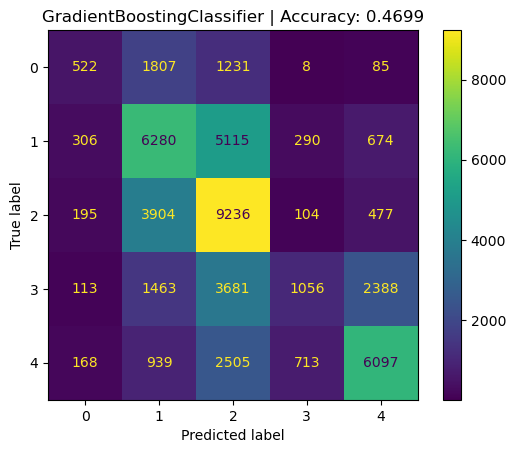

              precision    recall  f1-score   support

           0       0.40      0.14      0.21      3653
           1       0.44      0.50      0.46     12665
           2       0.42      0.66      0.52     13916
           3       0.49      0.12      0.19      8701
           4       0.63      0.59      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.47      0.40      0.40     49357
weighted avg       0.48      0.47      0.44     49357



In [84]:
# Fit, Predict Score, and Display Confusion Matrix
fit_predict_display_bestscores(best_gbst, X2n_val, y_val)

##### Plot Feature Importance for Best Estimator

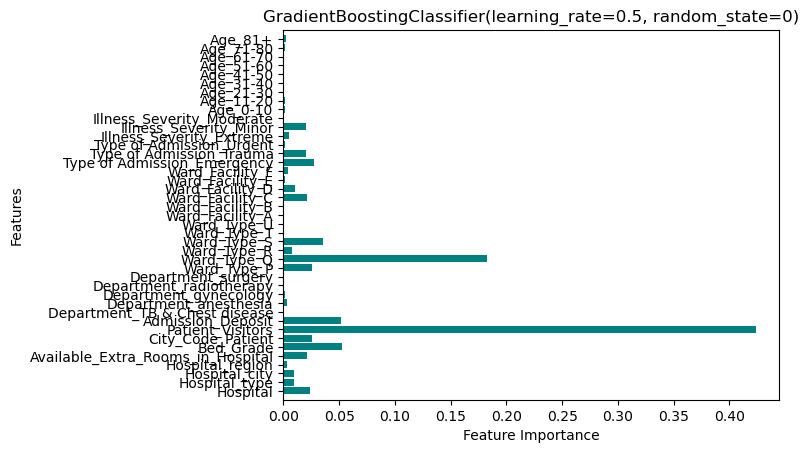

In [85]:
# Check Feature Importance from the model: 
plot_feature_importances(best_gbst, X_dummies)

<font color='blue' size='3'>With the GridSearchCV, the best estimator for GradientBoost has a learning rate=0.5 and achieved a validation accuracy of <B>0.4699</B>, which is an improvement from the baseline model. From the F1 scores, similar to the Random Forest model, this model also appears to be able to predict class 1, 2, and 4 better than class 0 and 3. Above, the feature importance plot shows that the most salient features are Patient Visitors and Ward_Type. Compared to the Random Forest model, this model has very distinct salient features and is more interpretable.</font>

#### AdaBoost Optimization

##### Apply GridSearchCV to find optium parameter value for learning rate

In [86]:
# Check values for learning_rate 
learning_rate = [0.1, 0.5, 0.7, 1.0, 1.5, 2.0]

In [87]:
# Search parameter and get scores for each value
scores_params = [] #append scores 
for m in learning_rate: #for each value in learning_rate
    AdaB = AdaBoostClassifier(random_state=0, learning_rate=m)
    scores = cross_val_score(AdaB, X=X2n_train, y=y_train, cv=3) #get cv score using classifer
    scores_params.append(scores.mean()) #append mean score

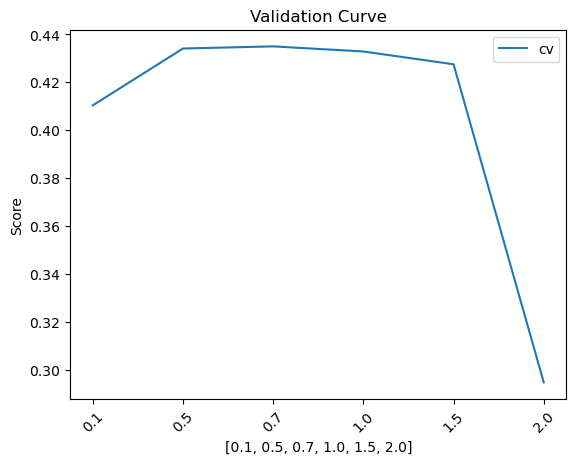

In [88]:
# Plot Validation Curve
plot_validation_curve(scores_params, learning_rate)

<font color='blue' size='3'>Above, the validation curve shows that the best scores occured when the learning rate is between 0.5 and 1.0. Values within this range will be checked in the GridSearch. </font>

##### Get Best Estimator from GridSearchCV with optium parameter value for learning rate

In [89]:
# Create parameter dictionary for learning_rate
ada_params = dict( 
    learning_rate = [0.5, 0.6, 0.7, 0.8, 1.0])

In [90]:
# Initiate Grid Search for learning_rate
gs_ada = GridSearchCV(estimator=AdaB, param_grid=ada_params, cv=3, n_jobs=-1)

In [91]:
# Fit GridSearchCV to Training Set
gs_ada.fit(X2n_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=2.0, random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.8, 1.0]})

In [136]:
# Capture Best Estimator Model for AdaBoost
best_ada = gs_ada.best_estimator_
best_ada_val = fit_predict_bestscore(best_ada, X2n_val, y_val)
best_ada

AdaBoostClassifier(learning_rate=0.7, random_state=0)

##### View Accuracy, Confusion Matrix, and Performance

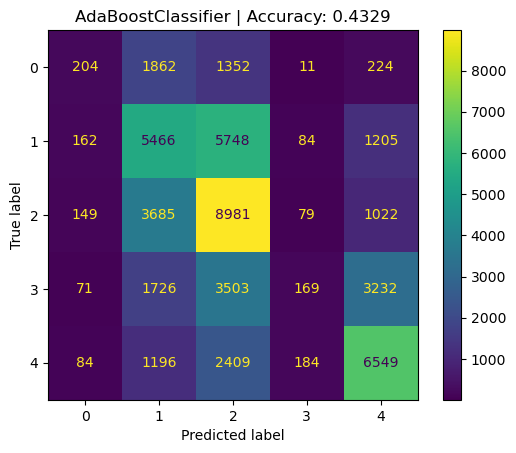

              precision    recall  f1-score   support

           0       0.30      0.06      0.09      3653
           1       0.39      0.43      0.41     12665
           2       0.41      0.65      0.50     13916
           3       0.32      0.02      0.04      8701
           4       0.54      0.63      0.58     10422

    accuracy                           0.43     49357
   macro avg       0.39      0.36      0.32     49357
weighted avg       0.41      0.43      0.38     49357



In [93]:
# View Accuracy, Confusion Matrix, and Performance
fit_predict_display_bestscores(best_ada, X2n_val, y_val)

##### Plot Feature Importance for Best Estimator

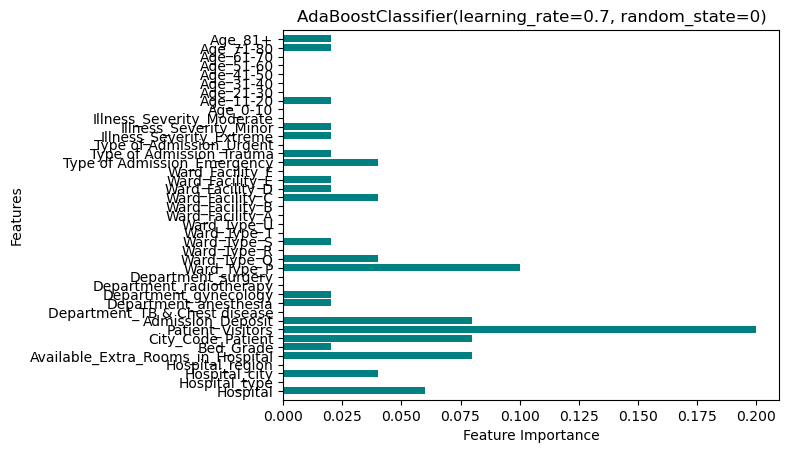

In [94]:
# Check Feature Importance from the model: 
plot_feature_importances(best_ada, X_dummies)

<font color='blue' size='3'>With the GridSearchCV, the best estimator for AdaBoost has a learning rate=0.7 and achieved a validation accuracy of <B>0.439</B>, which is not much of an improvement from the baseline model. From the F1 scores, similar to the Random Forest and Gradient Boost models, this model also appears to be able to predict class 1, 2, and 4 better than class 0 and 3. However, this model has a much lower F1 score for class 0 and 3 compared to the two other moels. Above, the feature importance plot shows that the most salient features are Patient Visitors, Ward_Type, Admission Deposit, City Code Visitors, Bed Grade, and Hospital. Compared to the Random Forest and Gradient Boost models, this model is significantly faster. Gradient Boost took the longest to compute and is around 5 times slower than this algorithm.  </font>

### Extended Models

<font color='blue' size='3'>Since GradientBoost and LDA classifiers performed well, enhanced versions of these models will be explored. An extended version of Gradient Boosting Classifier is Histogram-Based Gradient Boosting Classiifer which is an ensemble tree method where the trainin of the trees is accelerated by discretizing (binning) the continuous input features to a certain number of unique values. This method works well with large datasets and can handle high number of categorical features. An extended version of LDA Classifier is Quadratic Discriminant Analysis (QDA) which uses a qudratic decision surface to seperate measurements of two or more classes instead of a linear decision surface. QDA assumes that each class has its own covariance matrix and is generally more flexible compared to LDA.</font>

#### Histogram-Based Gradient Boost 

##### Apply GridSearchCV to find optium parameter value for learning rate

In [117]:
# Check values for learning_rate 
learning_rate = [0.01, 0.1, 0.5, 1.0, 1.5]

In [118]:
# Search parameter and get scores for each value
scores_params = [] #append scores 
for m in learning_rate: #for each value in learning_rate
    hgbst = HistGradientBoostingClassifier(random_state=0, learning_rate=m)
    scores = cross_val_score(hgbst, X=X2n_train, y=y_train, cv=3) #get cv score using classifer
    scores_params.append(scores.mean()) #append mean score

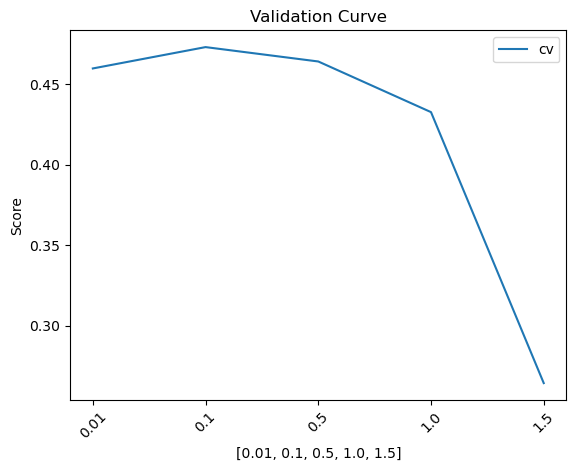

In [119]:
# Plot Validation Curve
plot_validation_curve(scores_params, learning_rate)

<font color='blue' size='3'>Above, the validation curve shows that the best scores occured when the learning rate is between 0.01 and 0.1. Values within this range will be checked in the GridSearch. </font>

##### Get Best Estimator from GridSearchCV with optium parameter value for learning_rate

In [123]:
# Create parameter dictionary for learning_rate
hgbst_params = dict( 
    learning_rate = [0.03, 0.05, 0.09, 0.1, 0.15])

In [126]:
# Initiate Grid Search for learning_rate
hgbst = HistGradientBoostingClassifier(random_state=0)
gs_hgbst = GridSearchCV(estimator=hgbst, param_grid=hgbst_params, cv=3, n_jobs=-1)

In [127]:
# Fit GridSearchCV to Training Set
gs_hgbst.fit(X2n_train, y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.05, 0.09, 0.1, 0.15]})

In [135]:
# Capture Best Estimator Model for HistGboost
best_hgbst = gs_hgbst.best_estimator_
best_hgbst_val = fit_predict_bestscore(best_hgbst, X2n_val, y_val)
best_hgbst

HistGradientBoostingClassifier(learning_rate=0.09, random_state=0)

##### View Accuracy, Confusion Matrix, and Performance

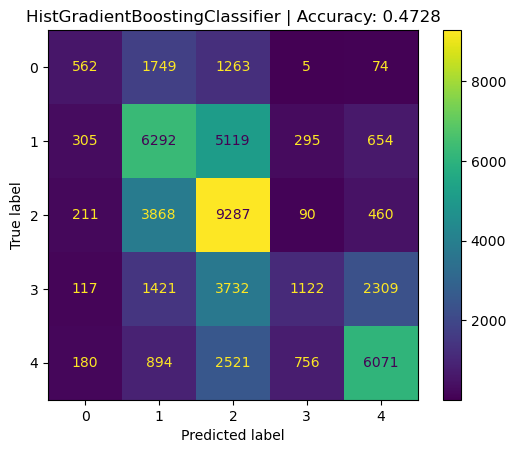

              precision    recall  f1-score   support

           0       0.41      0.15      0.22      3653
           1       0.44      0.50      0.47     12665
           2       0.42      0.67      0.52     13916
           3       0.49      0.13      0.20      8701
           4       0.63      0.58      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.48      0.41      0.40     49357
weighted avg       0.48      0.47      0.45     49357



In [129]:
# View Accuracy, Confusion Matrix, and Performance
fit_predict_display_bestscores(best_hgbst, X2n_val, y_val)

<font color='blue' size='3'>With the GridSearchCV, the best estimator for Histogram-Based Gradient Boost has a learning_rate=0.09 and achieved a validation accuracy of <B>0.4728</B>, which is the highest accuracy score compared to all previous models. This model is significantly faster and more efficient than the optimized Gradient Boosting model. This model appears to have improved in f1 score for class 0 and 3 compared to the other models, although it is still predicting class 1, 2, and 4 better more than half of the time. </font>

#### Quadratic Discriminant Analysis (QDA)

##### Apply GridSearchCV to find optium parameter value for reg_param

In [108]:
# Check values for reg_param
reg_param = [0.0, 0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2.0]

In [109]:
# Search parameter and get scores for each value
scores_params = [] #append scores 
for m in reg_param: #for each value in learning_rate
    QDA = QuadraticDiscriminantAnalysis(reg_param=m)
    scores = cross_val_score(QDA, X=X2n_train, y=y_train, cv=3) #get cv score using classifer
    scores_params.append(scores.mean()) #append mean score

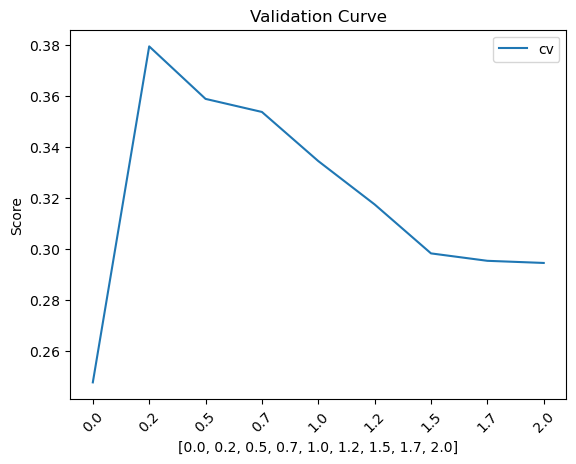

In [110]:
# Plot Validation Curve
plot_validation_curve(scores_params, reg_param)

<font color='blue' size='3'>Above, the validation curve shows that the best scores occured when reg_param is between 0.1 and 0.5. Values within this range will be checked in the GridSearch.</font>

##### Get Best Estimator from GridSearchCV with optium parameter value for reg_param

In [111]:
# Create parameter dictionary for reg_param
qda_params = dict( 
    reg_param = [0.1, 0.15, 0.2, 0.25, 0.3])

In [112]:
# Initiate Grid Search for reg_param
QDA = QuadraticDiscriminantAnalysis()
gs_qda = GridSearchCV(estimator=QDA, param_grid=qda_params, cv=3, n_jobs=-1)

In [113]:
# Fit GridSearchCV to Training Set
gs_qda.fit(X2n_train, y_train)

/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/miniconda3/envs/dsc_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables a

GridSearchCV(cv=3, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.1, 0.15, 0.2, 0.25, 0.3]})

In [134]:
# Capture Best Estimator Model for QDA
best_qda = gs_qda.best_estimator_
best_qda_val = fit_predict_bestscore(best_qda, X2n_val, y_val)
best_qda

QuadraticDiscriminantAnalysis(reg_param=0.1)

##### View Accuracy, Confusion Matrix, and Performance

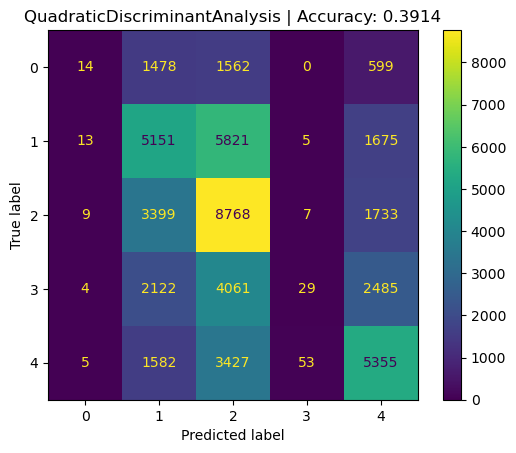

              precision    recall  f1-score   support

           0       0.31      0.00      0.01      3653
           1       0.38      0.41      0.39     12665
           2       0.37      0.63      0.47     13916
           3       0.31      0.00      0.01      8701
           4       0.45      0.51      0.48     10422

    accuracy                           0.39     49357
   macro avg       0.36      0.31      0.27     49357
weighted avg       0.37      0.39      0.34     49357



In [133]:
# View Accuracy, Confusion Matrix, and Performance
fit_predict_display_bestscores(best_qda, X2n_val, y_val)

<font color='blue' size='3'>With the GridSearchCV, the best estimator for QDA has a reg_param=0.1 and achieved a validation accuracy of <B>0.3914</B>, which is significantly lower than the accuracy score achieved from the LDA model. Similar to the LDA model, this model is unable to predict class 0 and 3, in which f1 scores for these two classes are extremely low at 0.01.</font>

### Results Summary for Optimized Models

In [137]:
# Display Accuracy Results for Optimized Models
optimized_df = [best_qda_val, best_ada_val, best_RF_val, best_gbst_val, best_hgbst_val]
optimized_results = pd.concat(optimized_df, ignore_index=True) #combine all model results
optimized_results

,Model,Accuracy,Balanced Accuracy
0,QuadraticDiscriminantAnalysis,0.3914,0.3116
1,AdaBoostClassifier,0.4329,0.3561
2,RandomForestClassifier,0.4419,0.4171
3,GradientBoostingClassifier,0.4699,0.4018
4,HistGradientBoostingClassifier,0.4728,0.4059


<font color='blue' size='3'>Above, when comparing the optimized models, the Histogram-Based Gradient Boosting model performed the best with an accuracy score of <B>0.4728</B> on the validation set. Quadratic Discriminant Analysis (QDA) performed the worst with an accuracy score of 0.3914. The model with the highest balanced accuracy score is Random Forest, which improved its performance over baseline model and performed slightly better than AdaBoost. All of the models were able to predict class 1, 2, and 4 better than class 0 and 3 as shown in their respective f1 scores. In terms of speed and efficiency, the Histogram-Based Gradient Boosting model was most efficient whereas the Gradient Boosting model was the slowest and had the most computation time.</font>

## Multiclass Learning Models

<font color='blue' size='3'>To further optimize model performance, multiclass learning meta-estimators models will be implemented. Multiclass methods provides support for multiclass prediction and custom multiclass strategies.<br><br></font>
<font color='blue' size='3'><B> One-vs-Rest (OvR) Approach:</B> This multiclass approach fits one classifier per class and the class is fitted against all other classes. <br></font>
<font color='blue' size='3'><B> One-vs-One (OvO)  Approach: </B> This multiclass approach fits one classifier per class pair and at time of prediction, the class which received the most votes is selected. </font>

### One-vs-Rest (OvR) Models

#### OvR Random Forest 

In [145]:
# Random Forest One-vs-Rest: Initialize Classifier
OvR_RF = OneVsRestClassifier(best_RF, n_jobs=-1)

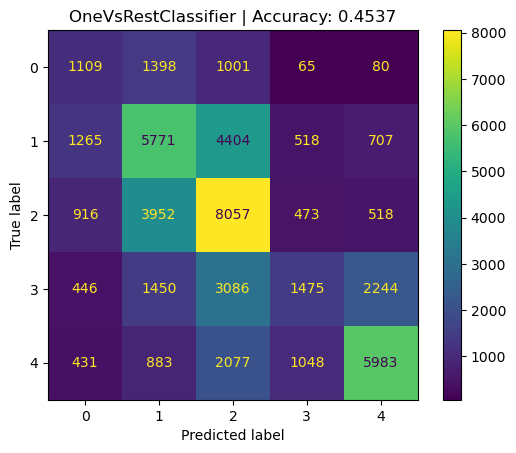

              precision    recall  f1-score   support

           0       0.27      0.30      0.28      3653
           1       0.43      0.46      0.44     12665
           2       0.43      0.58      0.50     13916
           3       0.41      0.17      0.24      8701
           4       0.63      0.57      0.60     10422

    accuracy                           0.45     49357
   macro avg       0.43      0.42      0.41     49357
weighted avg       0.46      0.45      0.44     49357



In [221]:
# View Accuracy, Confusion Matrix, and Performance
OvR_RF_val = fit_predict_score(OvR_RF, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvR_RF, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvR Random Forest model achieved a validation accuracy of <B>0.4537</B>, which is an improvement from the previous optimized Random Forest model. This model slightly improved predictions for class 1 and 2, although it did not improve predictions for class 0 or 3. </font>

#### OvR AdaBoost

In [142]:
# Adaboost One-vs-Rest: Initialize Classifier
OvR_ada = OneVsRestClassifier(best_ada, n_jobs=-1)

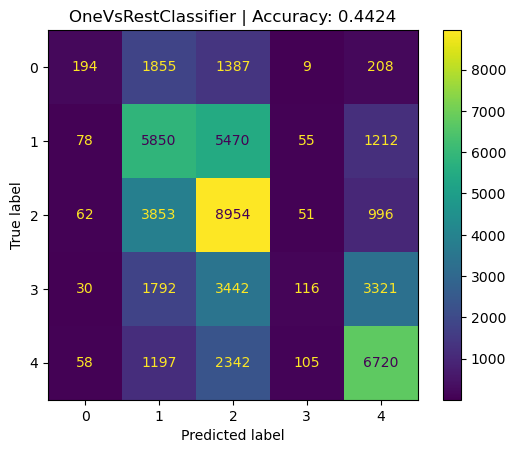

              precision    recall  f1-score   support

           0       0.46      0.05      0.10      3653
           1       0.40      0.46      0.43     12665
           2       0.41      0.64      0.50     13916
           3       0.35      0.01      0.03      8701
           4       0.54      0.64      0.59     10422

    accuracy                           0.44     49357
   macro avg       0.43      0.36      0.33     49357
weighted avg       0.43      0.44      0.39     49357



In [220]:
# View Accuracy, Confusion Matrix, and Performance
OvR_ada_val = fit_predict_score(OvR_ada, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvR_ada, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvR AdaBoost model achieved a validation accuracy of <B>0.4424</B>, which is an improvement from the previous optimized AdaBoost model. This model slighly improved its predication and f1 score for class 0. </font>

#### OvR HistGradient Boost

In [158]:
# Histogram-Based Gradient Boost One-vs-Rest: Initialize Classifier
OvR_hgbst = OneVsRestClassifier(best_hgbst, n_jobs=-1)

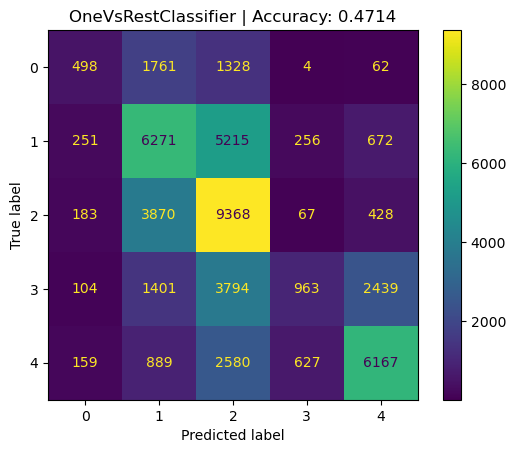

              precision    recall  f1-score   support

           0       0.42      0.14      0.21      3653
           1       0.44      0.50      0.47     12665
           2       0.42      0.67      0.52     13916
           3       0.50      0.11      0.18      8701
           4       0.63      0.59      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.48      0.40      0.40     49357
weighted avg       0.48      0.47      0.44     49357



In [219]:
# View Accuracy, Confusion Matrix, and Performance
OvR_hgbst_val = fit_predict_score(OvR_hgbst, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvR_hgbst, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvR Histogram-Based Gradient Boosting model achieved a validation accuracy of <B>0.4714</B>, which is a lower accuracy score than the previous optimized Histogram-Based Gradient Boosting model. Moreover, the One-vs-Rest strategy did not improve the performance for classifier. </font>

#### OvR Linear Discrimiant Analysis (LDA)

In [149]:
# LDA One-vs-Rest: Initialize Classifier
OvR_lda = OneVsRestClassifier(lda, n_jobs=-1)

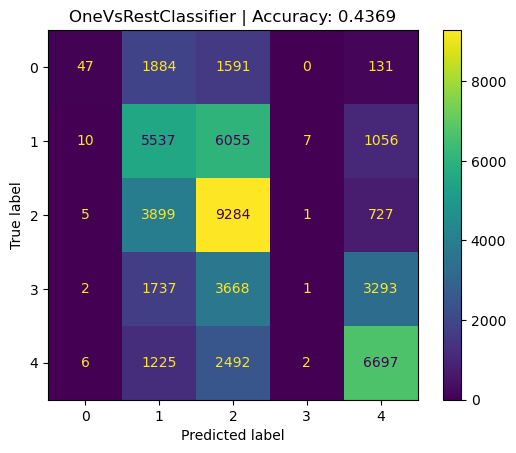

              precision    recall  f1-score   support

           0       0.67      0.01      0.03      3653
           1       0.39      0.44      0.41     12665
           2       0.40      0.67      0.50     13916
           3       0.09      0.00      0.00      8701
           4       0.56      0.64      0.60     10422

    accuracy                           0.44     49357
   macro avg       0.42      0.35      0.31     49357
weighted avg       0.40      0.44      0.38     49357



In [218]:
# View Accuracy, Confusion Matrix, and Performance
OvR_lda_val = fit_predict_score(OvR_lda, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvR_lda, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvR LDA model achieved a validation accuracy of <B>0.4369</B>, which is a lower accuracy score than the baseline LDA model. Moreover, the One-vs-Rest strategy did not improve the performance for the LDA classifier. </font>

### One-vs-One (OvO) Models

#### OvO Random Forest 

In [151]:
# Random Forest One-vs-One: Initialize Classifier
OvO_RF = OneVsOneClassifier(best_RF, n_jobs=-1)

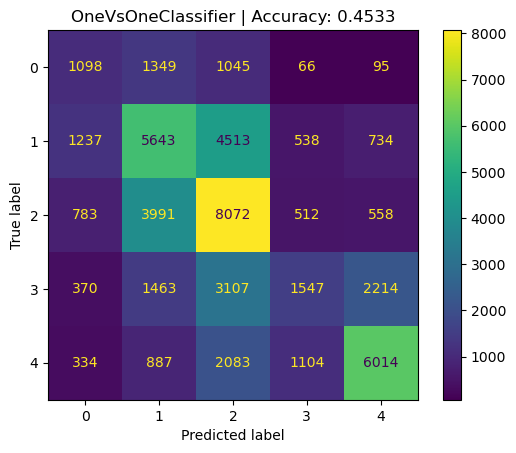

              precision    recall  f1-score   support

           0       0.29      0.30      0.29      3653
           1       0.42      0.45      0.43     12665
           2       0.43      0.58      0.49     13916
           3       0.41      0.18      0.25      8701
           4       0.63      0.58      0.60     10422

    accuracy                           0.45     49357
   macro avg       0.44      0.42      0.41     49357
weighted avg       0.46      0.45      0.44     49357



In [217]:
# View Accuracy, Confusion Matrix, and Performance
OvO_RF_val = fit_predict_score(OvO_RF, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvO_RF, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvO Random Forest model achieved a validation accuracy of <B>0.4533</B>, which is very similar but slightly lower than the OvR Random Forest model. This model however improved slighly in f1 score for class 0 and 3, compared to the OvR Random Forest model, at the cost of a slighly lower f1 score for class 1, 2, and 4. </font>

#### OvO AdaBoost

In [156]:
# Adaboost One-vs-One: Initialize Classifier
OvO_ada = OneVsOneClassifier(best_ada, n_jobs=-1)

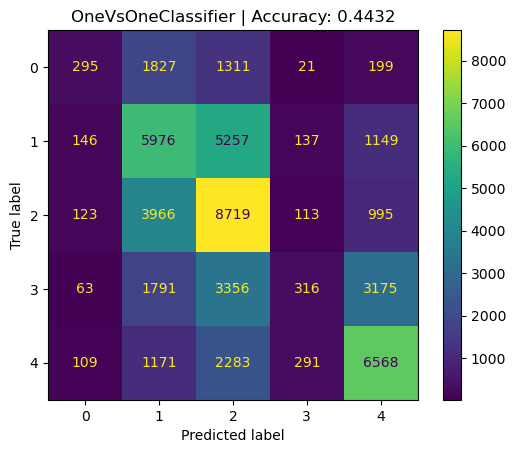

              precision    recall  f1-score   support

           0       0.40      0.08      0.13      3653
           1       0.41      0.47      0.44     12665
           2       0.42      0.63      0.50     13916
           3       0.36      0.04      0.07      8701
           4       0.54      0.63      0.58     10422

    accuracy                           0.44     49357
   macro avg       0.43      0.37      0.34     49357
weighted avg       0.43      0.44      0.40     49357



In [216]:
# View Accuracy, Confusion Matrix, and Performance
OvO_ada_val = fit_predict_score(OvO_ada, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvO_ada, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvO AdaBoost model achieved a validation accuracy of <B>0.4432</B>, which is similar but slight improvement from the OvR AdaBoost model. This model improves its predication and f1 score for class 0 compared to the OvR AdaBoost model. </font>

#### OvO HistGradient Boost

In [159]:
# Histogram-Based Gradient Boost One-vs-One: Initialize Classifier
OvO_hgbst = OneVsOneClassifier(best_hgbst, n_jobs=-1)

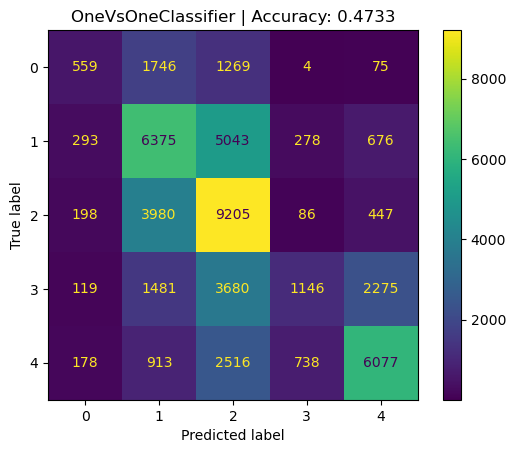

              precision    recall  f1-score   support

           0       0.41      0.15      0.22      3653
           1       0.44      0.50      0.47     12665
           2       0.42      0.66      0.52     13916
           3       0.51      0.13      0.21      8701
           4       0.64      0.58      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.48      0.41      0.41     49357
weighted avg       0.49      0.47      0.45     49357



In [215]:
# View Accuracy, Confusion Matrix, and Performance
OvO_hgbst_val = fit_predict_score(OvO_hgbst, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvO_hgbst, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvO Histogram-Based Gradient Boosting model achieved a validation accuracy of <B>0.4733</B>, which is a slight improvement over the previous optimized Histogram-Based Gradient Boosting model and better than the OvR model. This model slightly improved in predictions and f1 score for class 3. </font>

#### OvO Linear Discrimiant Analysis (LDA)

In [161]:
# LDA One-vs-One: Initialize Classifier
OvO_lda = OneVsOneClassifier(lda, n_jobs=-1)

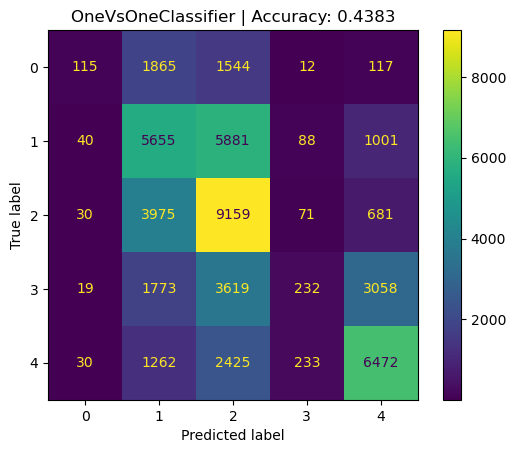

              precision    recall  f1-score   support

           0       0.49      0.03      0.06      3653
           1       0.39      0.45      0.42     12665
           2       0.40      0.66      0.50     13916
           3       0.36      0.03      0.05      8701
           4       0.57      0.62      0.60     10422

    accuracy                           0.44     49357
   macro avg       0.44      0.36      0.32     49357
weighted avg       0.44      0.44      0.39     49357



In [214]:
# View Accuracy, Confusion Matrix, and Performance
OvO_lda_val = fit_predict_score(OvO_lda, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(OvO_lda, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the OvO LDA model achieved a validation accuracy of <B>0.4383</B>, which is a slight improvement over the previous baseline LDA model and better than the OvR LDA model. This model slightly improved in predictions and f1 score for class 0 and 1 compared to the baseline LDA model. </font>

### Results Summary for OvR & OvO Models

In [222]:
# Display Accuracy Results for OvR & OvO Models
OvROvO_df = [OvR_lda_val, OvO_lda_val, OvO_ada_val, OvR_ada_val, OvO_RF_val, OvR_RF_val, 
             OvR_hgbst_val, OvO_hgbst_val]
OvROvO_results = pd.concat(OvROvO_df, ignore_index=True) #combine all model results
OvROvO_results.loc[[0], ['Model']] = 'One-vs-Rest(OvR)-LDA' #rename model
OvROvO_results.loc[[1], ['Model']] = 'One-vs-One(OvO)-LDA' #rename model
OvROvO_results.loc[[2], ['Model']] = 'One-vs-One(OvO)-AdaBoost' #rename model
OvROvO_results.loc[[3], ['Model']] = 'One-vs-Rest(OvR)-AdaBoost' #rename model
OvROvO_results.loc[[4], ['Model']] = 'One-vs-One(OvO)-RandomForest' #rename model
OvROvO_results.loc[[5], ['Model']] = 'One-vs-Rest(OvR)-RandomForest' #rename model
OvROvO_results.loc[[6], ['Model']] = 'One-vs-Rest(OvR)-HistGradientBoost' #rename model
OvROvO_results.loc[[7], ['Model']] = 'One-vs-One(OvO)-HistGradientBoost' #rename model
OvROvO_results

,Model,Accuracy,Balanced Accuracy
0,One-vs-Rest(OvR)-LDA,0.4369,0.3520
1,One-vs-One(OvO)-LDA,0.4383,0.3568
2,One-vs-One(OvO)-AdaBoost,0.4432,0.3691
3,One-vs-Rest(OvR)-AdaBoost,0.4424,0.3633
4,One-vs-One(OvO)-RandomForest,0.4533,0.4162
5,One-vs-Rest(OvR)-RandomForest,0.4537,0.4164
6,One-vs-Rest(OvR)-HistGradientBoost,0.4714,0.4014
7,One-vs-One(OvO)-HistGradientBoost,0.4733,0.4065


<font color='blue' size='3'>Above, when comparing the One-vs-Rest (OvR) and One-vs-One (OvO) models, Histogram-Based Gradient Boost and LDA classifiers saw slight improvements in performance with a One-vs-One strategy. In contrast, Random Forest and AdaBoost classifiers saw slight improvements in performance with a One-vs-Rest strategy. Implementing the OvR or OvO strategy did improve f1 scores for class 0 and 3, which are the classes most difficult to predict for this data. Overall, the best performing model is the Histogram-Based Gradient Boosting model with One-vs-One strategy. The model achieved a validation accuracy score of <B>0.4733</B> and balanced accuracy score of <B>0.4065.</B> </font>

## Voting Ensemble Models

<font color='blue' size='3'>Voting ensemble models train on an ensemble of various models and predicts the class based on their highest probability of chosen class as the output. By aggregating the previous optimized models, a single voting model can be fitted and predict the output based on combined majority of the voting for each output class. </font>

### Ensemble with Optimized Models

#### With Hard Voting

In [193]:
# Initialize VotingClassifier with best estimators for RF, HistGradientBoost, AdaBoost
vote_clf1 = VotingClassifier(estimators=[('RF', best_RF), ('HistGBoost', best_hgbst), 
                                        ('AdaBoost', best_ada)], voting='hard') #vote = hard 

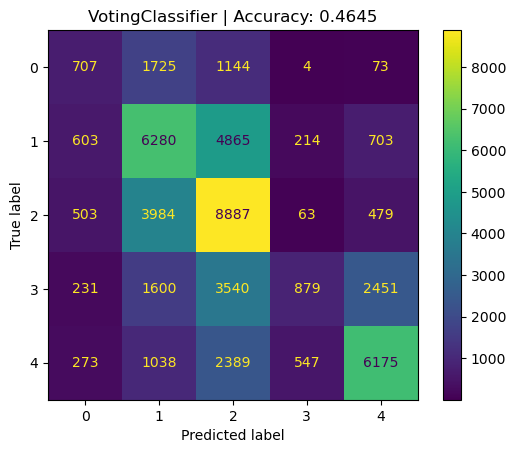

              precision    recall  f1-score   support

           0       0.31      0.19      0.24      3653
           1       0.43      0.50      0.46     12665
           2       0.43      0.64      0.51     13916
           3       0.51      0.10      0.17      8701
           4       0.62      0.59      0.61     10422

    accuracy                           0.46     49357
   macro avg       0.46      0.40      0.40     49357
weighted avg       0.48      0.46      0.44     49357



In [213]:
# View Accuracy, Confusion Matrix, and Performance
vote1_val = fit_predict_score(vote_clf1, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(vote_clf1, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

#### With Soft Voting

In [195]:
# Initialize VotingClassifier with best estimators for RF, HistGradientBoost, & AdaBoost
vote_clf2 = VotingClassifier(estimators=[('RF', best_RF), ('HistGBoost', best_hgbst), 
                                        ('AdaBoost', best_ada)], voting='soft') #vote = soft

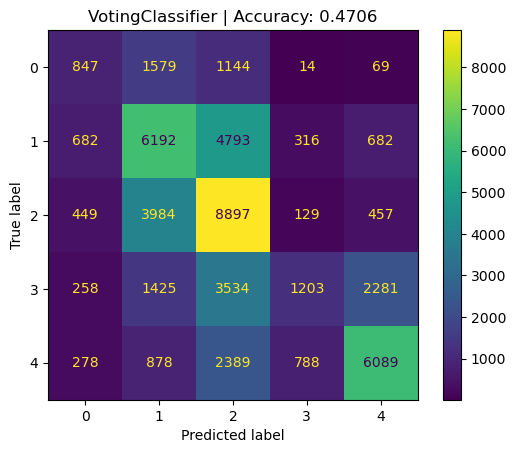

              precision    recall  f1-score   support

           0       0.34      0.23      0.27      3653
           1       0.44      0.49      0.46     12665
           2       0.43      0.64      0.51     13916
           3       0.49      0.14      0.22      8701
           4       0.64      0.58      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.47      0.42      0.42     49357
weighted avg       0.48      0.47      0.45     49357



In [211]:
# View Accuracy, Confusion Matrix, and Performance
vote2_val = fit_predict_score(vote_clf2, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(vote_clf2, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'> Above, the Voting Classifier with soft voting achieved better performance than with hard voting using the optimized Random Forest, HistGradient Boost, and AdaBoost models. The validation accuracy score for the hard voting model is <B>0.4645</B> whereas the accuracy score for the soft voting model is <B>0.4706</B>. In particular, the soft voting model has higher f1 scores and predicts class 0 and class 3 better than the hard voting model. Prior to this soft voting model, only the Histogram-Based Gradient Boost models have achieved an accuracy score above 0.47. MOreover, the Voting Classifier with soft voting is an improvement over the Random Forest and AdaBoost models. </font>

### Ensemble with OvR & OvO Models

#### OvR With Hard Voting

In [182]:
# Initialize VotingClassifier with OvR Models
vote_clf3 = VotingClassifier(estimators=[('OvR-RF', OvR_RF), ('OvR-HistGBoost', OvR_hgbst), 
                                        ('OvR-AdaBoost', OvR_ada)], voting='hard') #vote = hard 

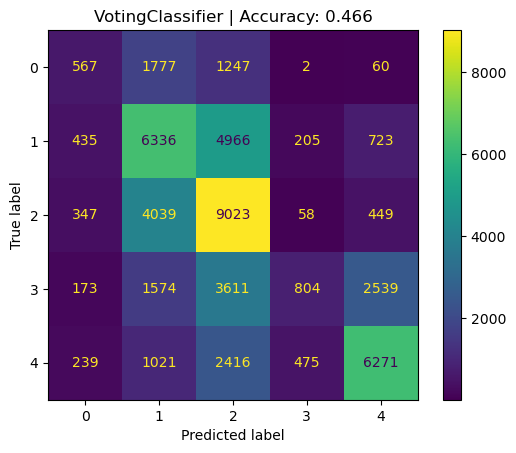

              precision    recall  f1-score   support

           0       0.32      0.16      0.21      3653
           1       0.43      0.50      0.46     12665
           2       0.42      0.65      0.51     13916
           3       0.52      0.09      0.16      8701
           4       0.62      0.60      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.46      0.40      0.39     49357
weighted avg       0.48      0.47      0.44     49357



In [210]:
# View Accuracy, Confusion Matrix, and Performance
vote3_val = fit_predict_score(vote_clf3, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(vote_clf3, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

#### OvR with Soft Voting

In [183]:
# Initialize VotingClassifier with OvR Models
vote_clf4 = VotingClassifier(estimators=[('OvR-RF', OvR_RF), ('OvR-HistGBoost', OvR_hgbst), 
                                        ('OvR-AdaBoost', OvR_ada)], voting='soft') #vote = soft

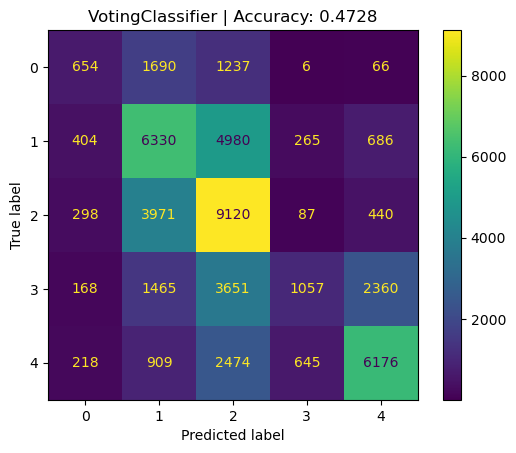

              precision    recall  f1-score   support

           0       0.38      0.18      0.24      3653
           1       0.44      0.50      0.47     12665
           2       0.42      0.66      0.52     13916
           3       0.51      0.12      0.20      8701
           4       0.63      0.59      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.48      0.41      0.41     49357
weighted avg       0.49      0.47      0.45     49357



In [209]:
# View Accuracy, Confusion Matrix, and Performance
vote4_val = fit_predict_score(vote_clf4, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(vote_clf4, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

#### OvO With Hard Voting

In [180]:
# Initialize VotingClassifier with OvO Models
vote_clf5 = VotingClassifier(estimators=[('OvO-RF', OvO_RF), ('OvO-HistGBoost', OvO_hgbst), 
                                        ('OvO-AdaBoost', OvO_ada)], voting='hard') #vote = hard 

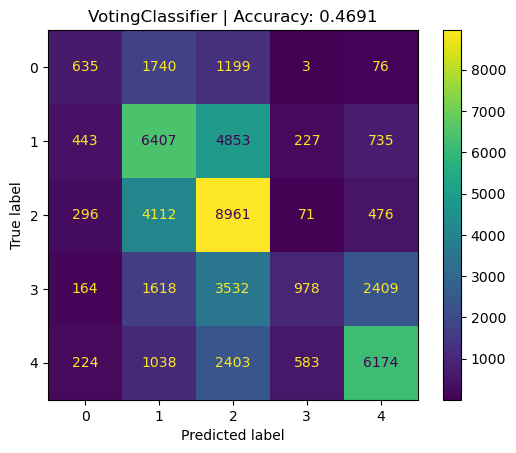

              precision    recall  f1-score   support

           0       0.36      0.17      0.23      3653
           1       0.43      0.51      0.46     12665
           2       0.43      0.64      0.51     13916
           3       0.53      0.11      0.19      8701
           4       0.63      0.59      0.61     10422

    accuracy                           0.47     49357
   macro avg       0.47      0.41      0.40     49357
weighted avg       0.48      0.47      0.44     49357



In [208]:
# View Accuracy, Confusion Matrix, and Performance
vote5_val = fit_predict_score(vote_clf5, X2n_train, y_train, X2n_val, y_val) # get scores as DF
fit_predict_display_scores(vote_clf5, X2n_train, y_train, X2n_val, y_val) # display  confusion matrix + score

<font color='blue' size='3'>Above, the Voting Classifier performed best with the One-vs-Rest (OvR) models using soft voting which achieved a validation accuracy of <B>0.4728</B>. This accuracy score is higher than the scores achieved individually from the OvR models, including higher than the OvR HisGradient Boost model. The model has higher f1 scores for class 0 and 3 compared to other models. The Voting Classifier with OvR using hard voting achieved a validation accuracy score of <B>0.466</B> whereas with OvO using hard voting achieved a score of <B>0.4691</B>. Due to the nature of soft voting, the voting classifer does not support soft voting with OvO.    

### Results Summary for Voting Ensembles

In [223]:
# Display Accuracy Results for Voting Ensembles
vote_df = [vote1_val, vote3_val, vote5_val, vote2_val, vote4_val]
vote_results = pd.concat(vote_df, ignore_index=True) #combine all model results
vote_results.loc[[0], ['Model']] = 'VotingClassifier-Optimized Models w/ Hard Vote' #rename model
vote_results.loc[[1], ['Model']] = 'VotingClassifier-OvR w/ Hard Vote' #rename model
vote_results.loc[[2], ['Model']] = 'VotingClassifier-OvO w/ Hard Vote' #rename model
vote_results.loc[[3], ['Model']] = 'VotingClassifier-Optimized Models w/ Soft Vote' #rename model
vote_results.loc[[4], ['Model']] = 'VotingClassifier-OvR w/ Soft Vote' #rename model
vote_results

,Model,Accuracy,Balanced Accuracy
0,VotingClassifier-Optimized Models w/ Hard Vote,0.4645,0.4043
1,VotingClassifier-OvR w/ Hard Vote,0.4660,0.3996
2,VotingClassifier-OvO w/ Hard Vote,0.4691,0.4057
3,VotingClassifier-Optimized Models w/ Soft Vote,0.4706,0.4165
4,VotingClassifier-OvR w/ Soft Vote,0.4728,0.4097


<font color='blue' size='3'>With the Voting Ensemble models, the models using soft voting performed better than the models using hard voting. The Voting Classifier with the One-to-Rest models (RandomForest, HistGradient Boost, and AdaBoost) with soft voting achieved the highest validation accuracy score at <B>0.4728</B>. The second highest performing model is the Voting ensemble using the optimized models with soft voting which achieved a similar but slightly lower accuracy score of <B>0.4706</B>. However, this model achieved the highest balanced accuracy score at <B>0.4165</B> compared to all other models.  </font>

## Model Evaluation on Test Set

<font color='blue' size='3'>With optimization, multiclass learning models, and voting ensemble models, the best performing models achieved accuracy scores of around <B>0.47</B>. The best performing models will be evaluated on the test set for final evaluation. The best optimized model is Histogram-Based Boosting Classifier, which is also used as the base estimator for the One-to-Rest (OvR) and One-to-One (OvO) Classifiers. The best voting classifiers included one ensemble with optimized Random Forest, Histogram-Based Gradient Boost, and AdaBoost using soft voting and another ensemble with OvR Random Forest, Histogram-Based Gradient Boost, and AdaBoost using soft voting. </font>

### Models with Highest Performance

In [224]:
# Display Classifier Models with Highest Accuracy
best_df = [vote2_val, OvR_hgbst_val, vote4_val, best_hgbst_val, OvO_hgbst_val]
best_results = pd.concat(best_df, ignore_index=True) #combine all model results
best_results.loc[[0], ['Model']] = 'VotingClassifier-Optimized Models w/ Soft Vote' #rename model
best_results.loc[[1], ['Model']] = 'One-vs-Rest(OvR)-HistGradientBoost' #rename model
best_results.loc[[2], ['Model']] = 'VotingClassifier-OvR w/ Soft Vote' #rename model
best_results.loc[[3], ['Model']] = 'HistGradientBoostingClassifier' #rename model
best_results.loc[[4], ['Model']] = 'One-vs-One(OvO)-HistGradientBoost' #rename model
best_results

,Model,Accuracy,Balanced Accuracy
0,VotingClassifier-Optimized Models w/ Soft Vote,0.4706,0.4165
1,One-vs-Rest(OvR)-HistGradientBoost,0.4714,0.4014
2,VotingClassifier-OvR w/ Soft Vote,0.4728,0.4097
3,HistGradientBoostingClassifier,0.4728,0.4059
4,One-vs-One(OvO)-HistGradientBoost,0.4733,0.4065


###  Voting Ensemble with Optimized Models

In [229]:
# View Classifier w/ Models & Soft Voting
vote_clf2

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=19,
                                                     random_state=0)),
                             ('HistGBoost',
                              HistGradientBoostingClassifier(learning_rate=0.09,
                                                             random_state=0)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.7,
                                                 random_state=0))],
                 voting='soft')

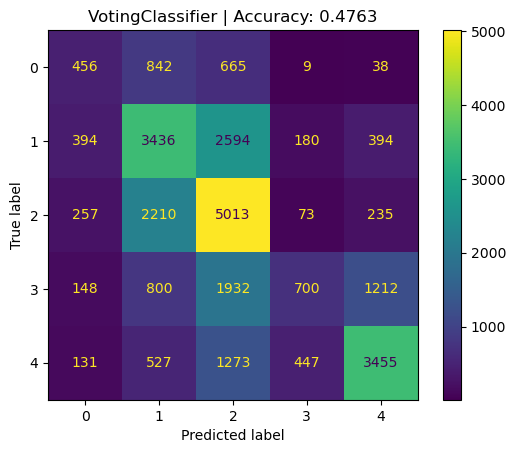

              precision    recall  f1-score   support

           0       0.33      0.23      0.27      2010
           1       0.44      0.49      0.46      6998
           2       0.44      0.64      0.52      7788
           3       0.50      0.15      0.23      4792
           4       0.65      0.59      0.62      5833

    accuracy                           0.48     27421
   macro avg       0.47      0.42      0.42     27421
weighted avg       0.48      0.48      0.46     27421



In [230]:
# Fit, Predict on Test Set and View Performance 
vote_test = fit_predict_score(vote_clf2, X2n_train, y_train, X2n_test, y_test) # get scores as DF
fit_predict_display_scores(vote_clf2, X2n_train, y_train, X2n_test, y_test) # display confusion matrix + score

<font color='blue' size='3'>The Voting Classifier with optimized models and soft voting achieved an accuracy score of <B>0.4763</B> on the testing set, which is better than the results from the validation set. The model in particular has a higher f1 score for class 0 on the testing set compared to the validation set.</font>

###  One-vs-Rest (OvR) - Histogram-Based Gradient Boost

In [232]:
# View Classifier 
OvR_hgbst

OneVsRestClassifier(estimator=HistGradientBoostingClassifier(learning_rate=0.09,
                                                             random_state=0),
                    n_jobs=-1)

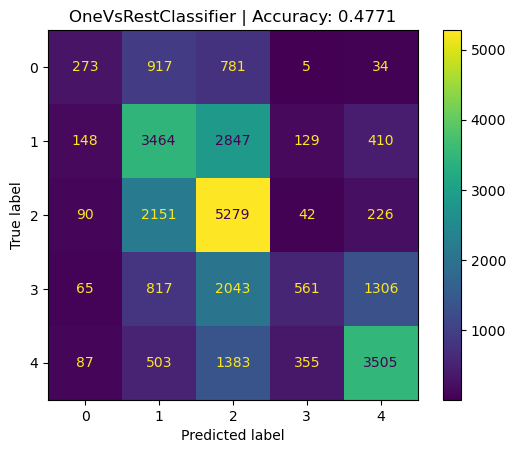

              precision    recall  f1-score   support

           0       0.41      0.14      0.20      2010
           1       0.44      0.49      0.47      6998
           2       0.43      0.68      0.52      7788
           3       0.51      0.12      0.19      4792
           4       0.64      0.60      0.62      5833

    accuracy                           0.48     27421
   macro avg       0.49      0.41      0.40     27421
weighted avg       0.49      0.48      0.45     27421



In [233]:
# Fit, Predict on Test Set and View Performance 
OvR_hgbst_test = fit_predict_score(OvR_hgbst, X2n_train, y_train, X2n_test, y_test) # get scores as DF
fit_predict_display_scores(OvR_hgbst, X2n_train, y_train, X2n_test, y_test) # display confusion matrix + score

<font color='blue' size='3'>The One-vs-Rest Classifier with Histogram-Based Gradient Boost as the base estimator achieved an accuracy score of <B>0.4771</B> on the testing set, which is better than the results from the validation set. The model in particular has a slightly higher f1 score for class 3 and 4 on the testing set compared to the validation set.<font color='blue' size='3'>

### Voting Ensemble with One-vs-Rest Models

In [234]:
# View Classifier w/ Models & Soft Voting
vote_clf4

VotingClassifier(estimators=[('OvR-RF',
                              OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                                   max_depth=19,
                                                                                   random_state=0),
                                                  n_jobs=-1)),
                             ('OvR-HistGBoost',
                              OneVsRestClassifier(estimator=HistGradientBoostingClassifier(learning_rate=0.09,
                                                                                           random_state=0),
                                                  n_jobs=-1)),
                             ('OvR-AdaBoost',
                              OneVsRestClassifier(estimator=AdaBoostClassifier(learning_rate=0.7,
                                                                               random_state=0),
                                                  n_jobs=-1))],
                 voting='soft')

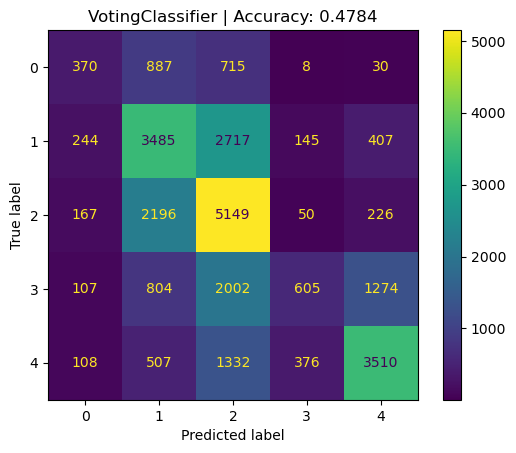

              precision    recall  f1-score   support

           0       0.37      0.18      0.25      2010
           1       0.44      0.50      0.47      6998
           2       0.43      0.66      0.52      7788
           3       0.51      0.13      0.20      4792
           4       0.64      0.60      0.62      5833

    accuracy                           0.48     27421
   macro avg       0.48      0.41      0.41     27421
weighted avg       0.49      0.48      0.45     27421



In [235]:
vote_OvR_test = fit_predict_score(vote_clf4, X2n_train, y_train, X2n_test, y_test) # get scores as DF
fit_predict_display_scores(vote_clf4, X2n_train, y_train, X2n_test, y_test) # display confusion matrix + score

<font color='blue' size='3'>The Voting Classifier with One-vs-Rest (OvR) models and soft voting achieved an accuracy score of <B>0.4784</B> on the testing set, which is better than the results from the validation set. The model in particular has a higher f1 score for class 0 and 4 on the testing set compared to the validation set.</font>

###  Histogram-Based Gradient Boosting

In [231]:
# View Classifier w/ Optimized Parameters
best_hgbst

HistGradientBoostingClassifier(learning_rate=0.09, random_state=0)

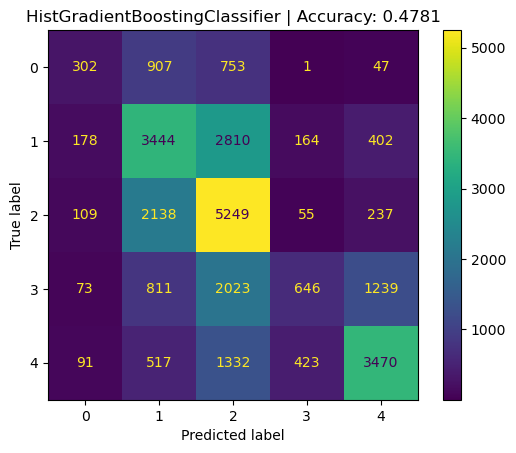

              precision    recall  f1-score   support

           0       0.40      0.15      0.22      2010
           1       0.44      0.49      0.46      6998
           2       0.43      0.67      0.53      7788
           3       0.50      0.13      0.21      4792
           4       0.64      0.59      0.62      5833

    accuracy                           0.48     27421
   macro avg       0.48      0.41      0.41     27421
weighted avg       0.49      0.48      0.45     27421



In [240]:
# Fit, Predict on Test Set and View Performance 
best_hgbst_test = fit_predict_score(best_hgbst, X2n_train, y_train, X2n_test, y_test) # get scores as DF
fit_predict_display_scores(best_hgbst, X2n_train, y_train, X2n_test, y_test) # display confusion matrix + score

<font color='blue' size='3'>The Histogram-Based Gradient Boosting model with optimized parameters achieved an accuracy score of <B>0.4781</B> on the testing set, which is slightly better than the results from the validation set. This model in particular has a higher f1 score for class 3 and 4 on the testing set compared to the validation set. </font>

###  One-vs-One (OvO) - Histogram Gradient Boost	

In [236]:
# View Classifier 
OvO_hgbst

OneVsOneClassifier(estimator=HistGradientBoostingClassifier(learning_rate=0.09,
                                                            random_state=0),
                   n_jobs=-1)

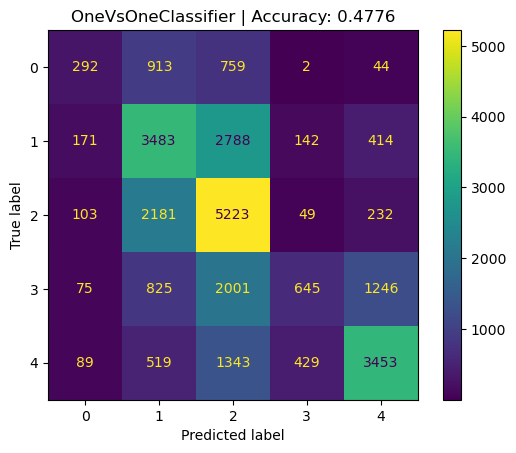

              precision    recall  f1-score   support

           0       0.40      0.15      0.21      2010
           1       0.44      0.50      0.47      6998
           2       0.43      0.67      0.52      7788
           3       0.51      0.13      0.21      4792
           4       0.64      0.59      0.62      5833

    accuracy                           0.48     27421
   macro avg       0.48      0.41      0.41     27421
weighted avg       0.49      0.48      0.45     27421



In [237]:
# Fit, Predict on Test Set and View Performance 
OvO_hgbst_test = fit_predict_score(OvO_hgbst, X2n_train, y_train, X2n_test, y_test) # get scores as DF
fit_predict_display_scores(OvO_hgbst, X2n_train, y_train, X2n_test, y_test) # display confusion matrix + score

<font color='blue' size='3'>The One-vs-One Classifier with Histogram-Based Gradient Boost as the base estimator achieved an accuracy score of <B>0.4776</B> on the testing set, which is better than the results from the validation set. This model is comparable to the One-vs-Rest Classiifer with Histogram-Based Gradient Boost and achieves a slightly higher testing accuracy.</font>

## Final Results and Best Model

In [241]:
# Display Final Results from Testing Evaluation
final_df = [vote2_val, vote_test, OvR_hgbst_val, OvR_hgbst_test, 
            OvO_hgbst_val, OvO_hgbst_test, best_hgbst_val, best_hgbst_test, vote4_val, vote_OvR_test]
final_results = pd.concat(final_df, ignore_index=True) #combine all model results
final_results.loc[[0, 1], ['Model']] = 'VotingClassifier-Optimized Models w/ Soft Vote' #rename model
final_results.loc[[2, 3], ['Model']] = 'One-vs-Rest(OvR)-HistGradientBoost' #rename model
final_results.loc[[4, 5], ['Model']] = 'One-vs-One(OvO)-HistGradientBoost' #rename model
final_results.loc[[6, 7], ['Model']] = 'HistGradientBoostingClassifier' #rename model
final_results.loc[[8, 9], ['Model']] = 'VotingClassifier-OvR w/ Soft Vote' #rename model
final_results.rename(index={0: 'Validation', 1: 'Testing', 2: 'Validation', 3: 'Testing', 
                            4: 'Validation', 5: 'Testing', 6: 'Validation', 7: 'Testing', 
                            8: 'Validation', 9: 'Testing'}) #rename df index 

,Model,Accuracy,Balanced Accuracy
Validation,VotingClassifier-Optimized Models w/ Soft Vote,0.4706,0.4165
Testing,VotingClassifier-Optimized Models w/ Soft Vote,0.4763,0.4200
Validation,One-vs-Rest(OvR)-HistGradientBoost,0.4714,0.4014
Testing,One-vs-Rest(OvR)-HistGradientBoost,0.4771,0.4053
Validation,One-vs-One(OvO)-HistGradientBoost,0.4733,0.4065
Testing,One-vs-One(OvO)-HistGradientBoost,0.4776,0.4080
Validation,HistGradientBoostingClassifier,0.4728,0.4059
Testing,HistGradientBoostingClassifier,0.4781,0.4092
Validation,VotingClassifier-OvR w/ Soft Vote,0.4728,0.4097
Testing,VotingClassifier-OvR w/ Soft Vote,0.4784,0.4142


<font color='blue' size='3'>The Voting Classifier with One-vs-Rest models (Random Forest, Histogram-Based Gradient Boost, and AdaBoost) with soft voting achieved the highest accuracy score on the test set at <B>0.4784</B>. This accuracy score is slightly higher than the validation accuracy score of <B>0.4728</B>. Moreover, the voting ensemble approach sucessfully took three tree models and outputted a model that performed better than all other models. The Runner Up model goes to the optimized Histogram Gradient Boosting Classifier model which achieved a testing accuracy of <B>0.4781</B>, which is very close to the same score achieved by the best model. This model is faster and more efficient and is a more simplied model is preferred, than this model would be preferred over the best model. The model that achieved the highest balanced accuracy is the Voting Classifier with optimized models with soft voting which achieved a balanced accuracy score of <B>0.42</B>. </font>

## Discussion and Future Work

### Discussion

<font color='blue' size='3'>Although the voting ensemble and the multiclass methods (including One-vs-Rest and One-vs-One) improved model performance and the resulting final models have higher accuracies than the baseline models, unforunately, the best model only achieved a testing accuracy of <B>0.4784</B>. This means that the models are not well fit to the data and unable to predict the target variable, Stay Days. Nevertheless, the model performance here is an improvement in model performance over the models presented by Jianing Pei et al. which analyzed the same dataset. Their analysis and findings were based on the original target variable having 9 classes, instead of combining the classes to become 5 classes as done in this analysis. Their suggestion for future analysis was to reduce the number of target classes to focus on Stay Days with 40 days or less. Moreover, this analysis has implemented their suggestion by creating the 41+ days class and condensing the target class to 5. The best model by Jianing Pei et al. achieved an accuracy score of 0.3541. Here, with the optimization methods implemented and with the voting ensemble, the final models performed better with accuracy scores above 0.47. </font>

<font color='blue' size='3'>There are several reasons that may be preventing the models from achieving higher performance. First, the dataset contains mostly categorical features with very few numeric features. The two main numeric features, Patient Visitors and Admission Deposit, ended up being the most salient features for the models as shown in the feature importance plots. With many categorical features, the number of dummy features is quite high which may affect model performance. Most importantly, the main reason the models may be unable to predict the target is because of the imbalance of the dataset. Throughout all of the models, the f1 scores were very low for class 0 and class 3. Class 0, which represents Stay Days 0-10, had significantly less instances than Class 1, 2, and 4. When there is a high imbalance of instances, especially in the target variable, it becomes more challenging for the algorithm to learn and predict. In addition, the data is also skewed in terms of distribution of features, with many of the features not following a normal distribution. In particular, for Department, there is over 78% of the instances from one department, Gynecology, out of 5 departments. Moreover, the imbalance of the dataset is likely the main factor to model performance. </font>

### Future Analysis

<font color='blue' size='3'>If given more time, further work on the dataset can be explored to improve model performance. First, since the dataset is quite large but since 78% of the data belongs to one Department, Gynecology, instead of analyzing the entire dataset, an analysis of a subset of the data, focusing only on the Gynecology department can be explored. This will reduce the number of features and potentially make the dataset more balanced. In addition, Ward Type has very little instances in 2 out of 5 categories, either drop the instances so that Ward Type only has 3 categories, or drop the feature altogether. From the feature importance plot from the Gradient Boosting Classifier, Ward_Type and Ward_Facility are not important features and thus, can be dropped. Next, for the target variable, class 0, which represents 0-10 days has too few instances, in future analysis, the target variable can be transformed so that the classes are combined as following: 0-10 days with 10-20 days = 0-20 days (class 0), 21-30 days (class 1), 31-40 days (class 2), and 41+ days (class 3). By condensing the target variable further to 4 classes, the class imbalance may be resolved and the models may be better able to predict the target variable based on the features. Lastly, additional feature selection can be performed prior to model training. Using the baseline models, specifically tree based models, select the features that are most salient and create enhanced models with feature selection applied. By addressing the data imbalance, target variable imbalance, and feature selection, models built with these changes in mind may result in better performance. Lastly, in terms of additional model optimization, since Gradient Boosting models fitted better to the dataset, perhaps a more enhanced boosting ensemble can be explored for model optimization.</font>